In [656]:
import pandas as pd

pollution = pd.read_csv('대기오염데이터.csv', encoding='cp949')
pollution

,Area,Line,Code,Place,Date,SO2,CO,O3,NO2,PM10,PM25,Add
0,서울 중구,도시대기,111121,중구,20200101,0.0030,0.70,0.0050,0.0330,33.0,28.0,서울 중구 덕수궁길 15
1,서울 용산구,도로변대기,111122,한강대로,20200101,0.0030,0.80,0.0060,0.0370,39.0,23.0,서울 용산구 한강대로 405
2,서울 종로구,도시대기,111123,종로구,20200101,0.0030,0.70,0.0070,0.0350,32.0,24.0,서울 종로구 종로35가길 19
3,서울 중구,도로변대기,111124,청계천로,20200101,0.0040,0.70,0.0060,0.0340,29.0,24.0,서울 중구 청계천로 184
4,서울 종로구,도로변대기,111125,종로,20200101,0.0030,0.70,0.0060,0.0310,42.0,28.0,서울 종로구 종로 169
...,...,...,...,...,...,...,...,...,...,...,...,...
49875,서울 금천구,도로변대기,111282,시흥대로,20230531,0.0027,0.42,0.0206,0.0476,29.0,11.0,서울 금천구 독산동 996-9
49876,서울 강북구,도시대기,111291,강북구,20230531,0.0022,0.31,0.0510,0.0103,21.0,8.0,서울 강북구 삼양로 139길 49
49877,서울 양천구,도시대기,111301,양천구,20230531,0.0025,0.33,0.0440,0.0134,22.0,8.0,서울 양천구 중앙로52길 56
49878,서울 노원구,도시대기,111311,노원구,20230531,0.0023,0.29,0.0540,0.0076,21.0,10.0,서울 노원구 상계로 118


In [657]:
pollution.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49880 entries, 0 to 49879
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Area    49880 non-null  object 
 1   Line    49880 non-null  object 
 2   Code    49880 non-null  int64  
 3   Place   49880 non-null  object 
 4   Date    49880 non-null  int64  
 5   SO2     48131 non-null  float64
 6   CO      47996 non-null  float64
 7   O3      48404 non-null  float64
 8   NO2     48256 non-null  float64
 9   PM10    47617 non-null  float64
 10  PM25    47723 non-null  float64
 11  Add     49880 non-null  object 
dtypes: float64(6), int64(2), object(4)
memory usage: 4.6+ MB


## Date 타입 변경
- Date 타입이 object 타입으로 되어있어서, Datetime 으로 타입을 변경하여 진행하도록 한다.

In [658]:
pollution['Date']= pollution['Date'].astype('str')
pollution['Date'] = pd.to_datetime(pollution['Date'])

In [659]:
pollution.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49880 entries, 0 to 49879
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Area    49880 non-null  object        
 1   Line    49880 non-null  object        
 2   Code    49880 non-null  int64         
 3   Place   49880 non-null  object        
 4   Date    49880 non-null  datetime64[ns]
 5   SO2     48131 non-null  float64       
 6   CO      47996 non-null  float64       
 7   O3      48404 non-null  float64       
 8   NO2     48256 non-null  float64       
 9   PM10    47617 non-null  float64       
 10  PM25    47723 non-null  float64       
 11  Add     49880 non-null  object        
dtypes: datetime64[ns](1), float64(6), int64(1), object(4)
memory usage: 4.6+ MB


In [660]:
# 결측값 확인
missing_values = pollution.isnull().sum()
missing_values

Area        0
Line        0
Code        0
Place       0
Date        0
SO2      1749
CO       1884
O3       1476
NO2      1624
PM10     2263
PM25     2157
Add         0
dtype: int64

## 결측값 변경하기
- 각 날짜별로 그룹화를 진행하여서, 각 결측값을 해당 날짜의 평균값으로 데이터를 변경할 예정이다.

In [661]:
pollution['SO2'] = pollution.groupby('Date')['SO2'].transform(lambda x: x.fillna(x.mean()))

In [662]:
pollution['CO'] = pollution.groupby('Date')['CO'].transform(lambda x: x.fillna(x.mean()))

In [663]:
pollution['O3'] = pollution.groupby('Date')['O3'].transform(lambda x: x.fillna(x.mean()))

In [664]:
pollution['NO2'] = pollution.groupby('Date')['NO2'].transform(lambda x: x.fillna(x.mean()))

In [665]:
pollution['PM10'] = pollution.groupby('Date')['PM10'].transform(lambda x: x.fillna(x.mean()))

In [666]:
pollution['PM25'] = pollution.groupby('Date')['PM25'].transform(lambda x: x.fillna(x.mean()))

In [667]:
# 결측값 확인
missing_values = pollution.isnull().sum()
missing_values

Area     0
Line     0
Code     0
Place    0
Date     0
SO2      0
CO       0
O3       0
NO2      0
PM10     0
PM25     0
Add      0
dtype: int64

## 결측값 완료
- 결측값 처리는 각 해당날짜의 평균값으로 정상적으로 변경되었다.
- 기초통계표를 확인해서 문제있는 데이터를 확인해보자.

In [668]:
pollution.describe()

,Code,Date,SO2,CO,O3,NO2,PM10,PM25
count,49880.000000,49880,49880.000000,49880.000000,49880.000000,49880.000000,49880.000000,49880.000000
mean,111209.775000,2021-09-15 00:00:00,0.003278,0.491406,0.029494,0.025533,41.653854,21.237408
min,111121.000000,2020-01-01 00:00:00,0.001000,0.090000,0.001000,0.001000,3.000000,1.000000
25%,111151.750000,2020-11-07 00:00:00,0.003000,0.357689,0.017700,0.014000,23.000000,10.000000
50%,111212.500000,2021-09-15 00:00:00,0.003000,0.440000,0.028000,0.023000,35.000000,17.000000
75%,111263.250000,2022-07-24 00:00:00,0.004000,0.600000,0.039000,0.034000,52.000000,27.358108
max,111312.000000,2023-05-31 00:00:00,0.011000,2.100000,0.114300,0.097000,436.000000,135.000000
std,61.082315,NaN,0.000953,0.202091,0.016023,0.014108,30.987784,16.236144


## 질병 데이터 추가
- 아토피, 비염, 천식이 미세먼지 농도와 연관성이 있는지 비교해보기 위해서 질병 데이터를 함께
- 추가해서 비교를 해볼 예정이다. CSV 파일을 서로 합쳐서 데이터프레임을 만들고 비교해보자.

In [669]:
atopi = pd.read_csv('아토피.csv', encoding='cp949')
atopi

,Date,Area,GEN,AGG,CNT
0,202001,서울 종로구,1,0,27
1,202001,서울 종로구,1,1,25
2,202001,서울 종로구,1,2,14
3,202001,서울 종로구,1,3,64
4,202001,서울 종로구,1,4,33
...,...,...,...,...,...
10795,202212,서울 강동구,2,1,106
10796,202212,서울 강동구,2,2,68
10797,202212,서울 강동구,2,3,432
10798,202212,서울 강동구,2,4,233


In [670]:
atopi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10800 entries, 0 to 10799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    10800 non-null  int64 
 1   Area    10800 non-null  object
 2   GEN     10800 non-null  int64 
 3   AGG     10800 non-null  int64 
 4   CNT     10800 non-null  int64 
dtypes: int64(4), object(1)
memory usage: 422.0+ KB


In [671]:
atopi['Date']= atopi['Date'].astype('str')
atopi['Date'] = pd.to_datetime(atopi['Date'], format='%Y%m')

In [672]:
atopi_df = atopi.groupby(['AGG', 'Area', atopi['Date'].dt.to_period("M")])['CNT'].sum().reset_index()

In [673]:
atopi_df

,AGG,Area,Date,CNT
0,0,서울 강남구,2020-01,245
1,0,서울 강남구,2020-02,216
2,0,서울 강남구,2020-03,232
3,0,서울 강남구,2020-04,309
4,0,서울 강남구,2020-05,362
...,...,...,...,...
5395,5,서울 중랑구,2022-08,127
5396,5,서울 중랑구,2022-09,122
5397,5,서울 중랑구,2022-10,125
5398,5,서울 중랑구,2022-11,107


In [674]:
atopi_df.rename(columns={'Date' : 'Month', 'CNT' : 'Atopi'}, inplace=True)

In [675]:
atopi_df

,AGG,Area,Month,Atopi
0,0,서울 강남구,2020-01,245
1,0,서울 강남구,2020-02,216
2,0,서울 강남구,2020-03,232
3,0,서울 강남구,2020-04,309
4,0,서울 강남구,2020-05,362
...,...,...,...,...
5395,5,서울 중랑구,2022-08,127
5396,5,서울 중랑구,2022-09,122
5397,5,서울 중랑구,2022-10,125
5398,5,서울 중랑구,2022-11,107


In [676]:
nose = pd.read_csv('비염.csv', encoding='cp949')
nose

,Date,Area,GEN,AGG,CNT
0,202001,서울 종로구,1,0,95
1,202001,서울 종로구,1,1,162
2,202001,서울 종로구,1,2,152
3,202001,서울 종로구,1,3,1095
4,202001,서울 종로구,1,4,884
...,...,...,...,...,...
10795,202212,서울 강동구,2,1,901
10796,202212,서울 강동구,2,2,601
10797,202212,서울 강동구,2,3,3472
10798,202212,서울 강동구,2,4,2171


In [677]:
nose.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10800 entries, 0 to 10799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    10800 non-null  int64 
 1   Area    10800 non-null  object
 2   GEN     10800 non-null  int64 
 3   AGG     10800 non-null  int64 
 4   CNT     10800 non-null  int64 
dtypes: int64(4), object(1)
memory usage: 422.0+ KB


In [678]:
nose['Date']= nose['Date'].astype('str')
nose['Date'] = pd.to_datetime(nose['Date'], format='%Y%m')

In [679]:
nose_df = nose.groupby(['AGG', 'Area', nose['Date'].dt.to_period("M")])['CNT'].sum().reset_index()

In [680]:
nose_df

,AGG,Area,Date,CNT
0,0,서울 강남구,2020-01,848
1,0,서울 강남구,2020-02,611
2,0,서울 강남구,2020-03,337
3,0,서울 강남구,2020-04,581
4,0,서울 강남구,2020-05,1905
...,...,...,...,...
5395,5,서울 중랑구,2022-08,2010
5396,5,서울 중랑구,2022-09,2289
5397,5,서울 중랑구,2022-10,2284
5398,5,서울 중랑구,2022-11,2410


In [681]:
nose_df.rename(columns={'Date' : 'Month', 'CNT' : 'Nose'}, inplace=True)

In [682]:
nose_df

,AGG,Area,Month,Nose
0,0,서울 강남구,2020-01,848
1,0,서울 강남구,2020-02,611
2,0,서울 강남구,2020-03,337
3,0,서울 강남구,2020-04,581
4,0,서울 강남구,2020-05,1905
...,...,...,...,...
5395,5,서울 중랑구,2022-08,2010
5396,5,서울 중랑구,2022-09,2289
5397,5,서울 중랑구,2022-10,2284
5398,5,서울 중랑구,2022-11,2410


In [683]:
asthma = pd.read_csv('천식.csv', encoding='cp949')
asthma

,Date,Area,GEN,AGG,CNT
0,202001,서울 종로구,1,0,19
1,202001,서울 종로구,1,1,11
2,202001,서울 종로구,1,2,13
3,202001,서울 종로구,1,3,50
4,202001,서울 종로구,1,4,63
...,...,...,...,...,...
10778,202212,서울 강동구,2,1,55
10779,202212,서울 강동구,2,2,17
10780,202212,서울 강동구,2,3,179
10781,202212,서울 강동구,2,4,128


In [684]:
asthma.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10783 entries, 0 to 10782
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    10783 non-null  int64 
 1   Area    10783 non-null  object
 2   GEN     10783 non-null  int64 
 3   AGG     10783 non-null  int64 
 4   CNT     10783 non-null  int64 
dtypes: int64(4), object(1)
memory usage: 421.3+ KB


In [685]:
asthma['Date']= asthma['Date'].astype('str')
asthma['Date'] = pd.to_datetime(asthma['Date'], format='%Y%m')

In [686]:
asthma_df = asthma.groupby(['AGG', 'Area', asthma['Date'].dt.to_period("M")])['CNT'].sum().reset_index()

In [687]:
asthma_df.rename(columns={'Date' : 'Month', 'CNT' : 'Asthma'}, inplace=True)

In [688]:
asthma_df

,AGG,Area,Month,Asthma
0,0,서울 강남구,2020-01,293
1,0,서울 강남구,2020-02,205
2,0,서울 강남구,2020-03,73
3,0,서울 강남구,2020-04,55
4,0,서울 강남구,2020-05,200
...,...,...,...,...
5393,5,서울 중랑구,2022-08,293
5394,5,서울 중랑구,2022-09,344
5395,5,서울 중랑구,2022-10,323
5396,5,서울 중랑구,2022-11,327


## 데이터 전처리
- 질병 데이터를 병합하기 이전에 질병데이터는 일자별로 취합되있는게 아니라, 월별로 통합되있기 때문에
- 기존에 pollution 데이터프레임의 월평균을 그룹화해서 구별로 통합시켜서 새로운 데이터프레임을 만든다.

In [689]:
pollution['Date']= pollution['Date'].astype('str')
pollution['Date'] = pd.to_datetime(pollution['Date'])

In [690]:
pollution['Month'] = pollution['Date'].dt.to_period("M")

monthly_df = pollution.groupby(['Month', 'Area']).mean(numeric_only=True).reset_index()

In [691]:
monthly_df

,Month,Area,Code,SO2,CO,O3,NO2,PM10,PM25
0,2020-01,서울 강남구,111262.0,0.003452,0.920034,0.013274,0.038058,45.033130,28.792244
1,2020-01,서울 강동구,111274.5,0.004375,0.714599,0.012358,0.038714,55.554926,33.175240
2,2020-01,서울 강북구,111291.0,0.003903,0.667742,0.016355,0.038419,56.451613,38.451613
3,2020-01,서울 강서구,111212.5,0.005325,0.713837,0.013060,0.037685,66.145161,35.449915
4,2020-01,서울 관악구,111251.0,0.004097,0.719355,0.013345,0.036839,47.252833,29.715780
...,...,...,...,...,...,...,...,...,...
1020,2023-05,서울 용산구,111126.5,0.003415,0.462619,0.047099,0.021819,51.774607,22.792390
1021,2023-05,서울 은평구,111181.0,0.002397,0.414662,0.051792,0.013902,44.836228,17.960298
1022,2023-05,서울 종로구,111124.0,0.003516,0.485098,0.042326,0.020762,42.615102,15.992969
1023,2023-05,서울 중구,111122.5,0.003528,0.471452,0.042123,0.022056,40.983871,18.370968


## 월별 취합
- 월별로 평균값으로 구별로 통합해서 데이터 프레임을 만들었다. 이제 가지고 있는 질병 데이터를
- 추가해서 병합하는 작업을 진행한다.

In [692]:
merged_df = pd.merge(monthly_df, atopi_df, on=['Area', 'Month'], how='inner')

In [693]:
merged_df

,Month,Area,Code,SO2,CO,O3,NO2,PM10,PM25,AGG,Atopi
0,2020-01,서울 강남구,111262.0,0.003452,0.920034,0.013274,0.038058,45.033130,28.792244,0,245
1,2020-01,서울 강남구,111262.0,0.003452,0.920034,0.013274,0.038058,45.033130,28.792244,1,204
2,2020-01,서울 강남구,111262.0,0.003452,0.920034,0.013274,0.038058,45.033130,28.792244,2,163
3,2020-01,서울 강남구,111262.0,0.003452,0.920034,0.013274,0.038058,45.033130,28.792244,3,594
4,2020-01,서울 강남구,111262.0,0.003452,0.920034,0.013274,0.038058,45.033130,28.792244,4,284
...,...,...,...,...,...,...,...,...,...,...,...
5395,2022-12,서울 중랑구,111151.0,0.002923,0.493052,0.018791,0.026081,45.378608,24.611249,1,111
5396,2022-12,서울 중랑구,111151.0,0.002923,0.493052,0.018791,0.026081,45.378608,24.611249,2,42
5397,2022-12,서울 중랑구,111151.0,0.002923,0.493052,0.018791,0.026081,45.378608,24.611249,3,304
5398,2022-12,서울 중랑구,111151.0,0.002923,0.493052,0.018791,0.026081,45.378608,24.611249,4,132


In [694]:
merged_df = pd.merge(merged_df, nose_df, on=['Area', 'Month', 'AGG'], how='inner')

In [695]:
merged_df

,Month,Area,Code,SO2,CO,O3,NO2,PM10,PM25,AGG,Atopi,Nose
0,2020-01,서울 강남구,111262.0,0.003452,0.920034,0.013274,0.038058,45.033130,28.792244,0,245,848
1,2020-01,서울 강남구,111262.0,0.003452,0.920034,0.013274,0.038058,45.033130,28.792244,1,204,1422
2,2020-01,서울 강남구,111262.0,0.003452,0.920034,0.013274,0.038058,45.033130,28.792244,2,163,1463
3,2020-01,서울 강남구,111262.0,0.003452,0.920034,0.013274,0.038058,45.033130,28.792244,3,594,9008
4,2020-01,서울 강남구,111262.0,0.003452,0.920034,0.013274,0.038058,45.033130,28.792244,4,284,6435
...,...,...,...,...,...,...,...,...,...,...,...,...
5395,2022-12,서울 중랑구,111151.0,0.002923,0.493052,0.018791,0.026081,45.378608,24.611249,1,111,1444
5396,2022-12,서울 중랑구,111151.0,0.002923,0.493052,0.018791,0.026081,45.378608,24.611249,2,42,998
5397,2022-12,서울 중랑구,111151.0,0.002923,0.493052,0.018791,0.026081,45.378608,24.611249,3,304,5996
5398,2022-12,서울 중랑구,111151.0,0.002923,0.493052,0.018791,0.026081,45.378608,24.611249,4,132,3838


In [696]:
merged_df = pd.merge(merged_df, asthma_df, on=['Area', 'Month', 'AGG'], how='inner')

In [697]:
merged_df

,Month,Area,Code,SO2,CO,O3,NO2,PM10,PM25,AGG,Atopi,Nose,Asthma
0,2020-01,서울 강남구,111262.0,0.003452,0.920034,0.013274,0.038058,45.033130,28.792244,0,245,848,293
1,2020-01,서울 강남구,111262.0,0.003452,0.920034,0.013274,0.038058,45.033130,28.792244,1,204,1422,281
2,2020-01,서울 강남구,111262.0,0.003452,0.920034,0.013274,0.038058,45.033130,28.792244,2,163,1463,95
3,2020-01,서울 강남구,111262.0,0.003452,0.920034,0.013274,0.038058,45.033130,28.792244,3,594,9008,519
4,2020-01,서울 강남구,111262.0,0.003452,0.920034,0.013274,0.038058,45.033130,28.792244,4,284,6435,428
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5393,2022-12,서울 중랑구,111151.0,0.002923,0.493052,0.018791,0.026081,45.378608,24.611249,1,111,1444,71
5394,2022-12,서울 중랑구,111151.0,0.002923,0.493052,0.018791,0.026081,45.378608,24.611249,2,42,998,54
5395,2022-12,서울 중랑구,111151.0,0.002923,0.493052,0.018791,0.026081,45.378608,24.611249,3,304,5996,336
5396,2022-12,서울 중랑구,111151.0,0.002923,0.493052,0.018791,0.026081,45.378608,24.611249,4,132,3838,327


## 통합된 데이터
- 기존 미세먼지 농도 수치와 질병 데이터를 나이대로 구분한 데이터프레임을 서로 병합해서 추가하였다.
- 기초통계표를 확인해보고 해당 데이터프레임을 가지고 이상치와 상관관계를 확인해보자.

In [698]:
merged_df.describe()

,Code,SO2,CO,O3,NO2,PM10,PM25,AGG,Atopi,Nose,Asthma
count,5398.000000,5398.000000,5398.000000,5398.000000,5398.000000,5398.000000,5398.000000,5398.000000,5398.000000,5398.000000,5398.000000
mean,111211.292608,0.003254,0.481099,0.029904,0.024361,39.157564,20.481615,2.500556,207.111152,1629.146906,144.779177
std,60.106401,0.000587,0.121135,0.011319,0.007540,13.127892,7.413901,1.707947,163.198638,1405.771759,107.828078
min,111122.500000,0.001548,0.196505,0.010726,0.007467,11.900000,5.216032,0.000000,10.000000,39.000000,1.000000
25%,111153.000000,0.002833,0.393548,0.019766,0.019231,26.787398,14.498619,1.000000,99.000000,667.250000,53.000000
50%,111212.500000,0.003212,0.458065,0.028931,0.023933,42.343597,20.030180,3.000000,159.000000,1238.500000,130.000000
75%,111263.000000,0.003617,0.561667,0.038471,0.030382,48.331992,25.853195,4.000000,259.000000,2118.000000,215.000000
max,111311.500000,0.005643,0.920034,0.060289,0.045758,86.739454,41.944495,5.000000,1137.000000,12618.000000,758.000000


C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categor

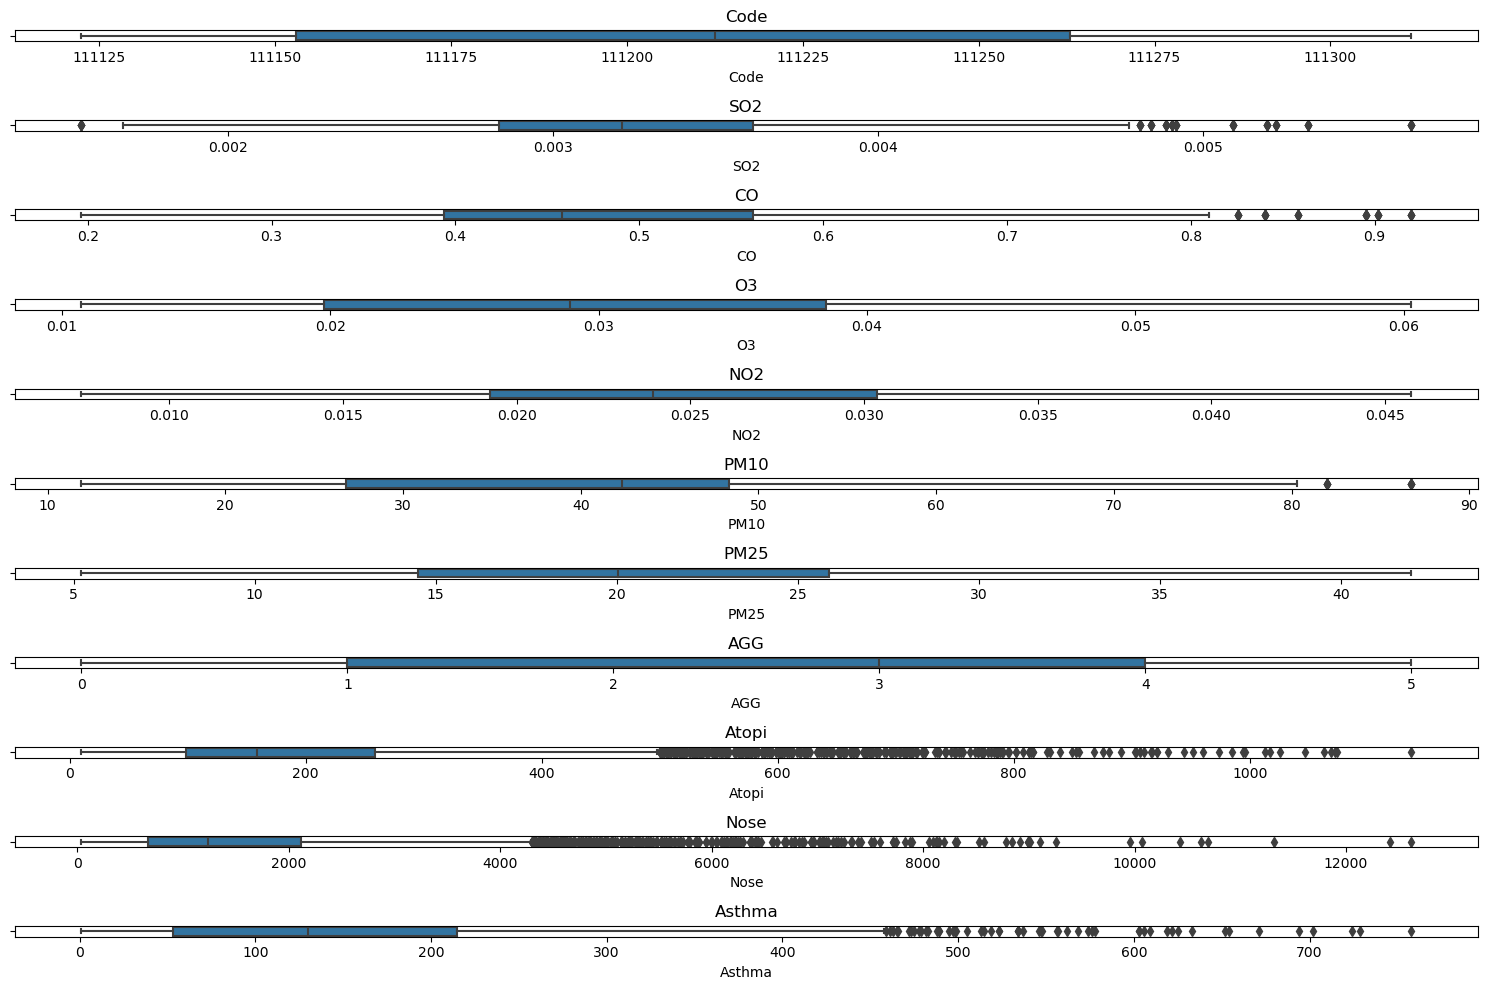

In [699]:
# 이상치 시각화
import matplotlib.pyplot as plt
import seaborn as sns

# 수치형 컬럼 선택
numeric_columns = merged_df.select_dtypes(include=['number']).columns

# 박스 플롯을 사용하여 각 컬럼의 이상치 시각화
plt.figure(figsize=(15, 10))

for i, col in enumerate(numeric_columns):
    plt.subplot(len(numeric_columns), 1, i+1)
    sns.boxplot(x=merged_df[col])
    plt.title(col)

plt.tight_layout()
plt.show()

## 이상치 확인
- 확인해봤을 때, 질병에 관련된 이상치 값만 어느정도 문제있는 정도일뿐, 미세먼지 농도는 문제가 없다.
- 질병의 경우 워낙에 천차만별인 수치가 꽤 많은편이나, 계절이나 환경에 영향이 있을 수 있기 때문에 우선은 진행한다.

<Axes: >

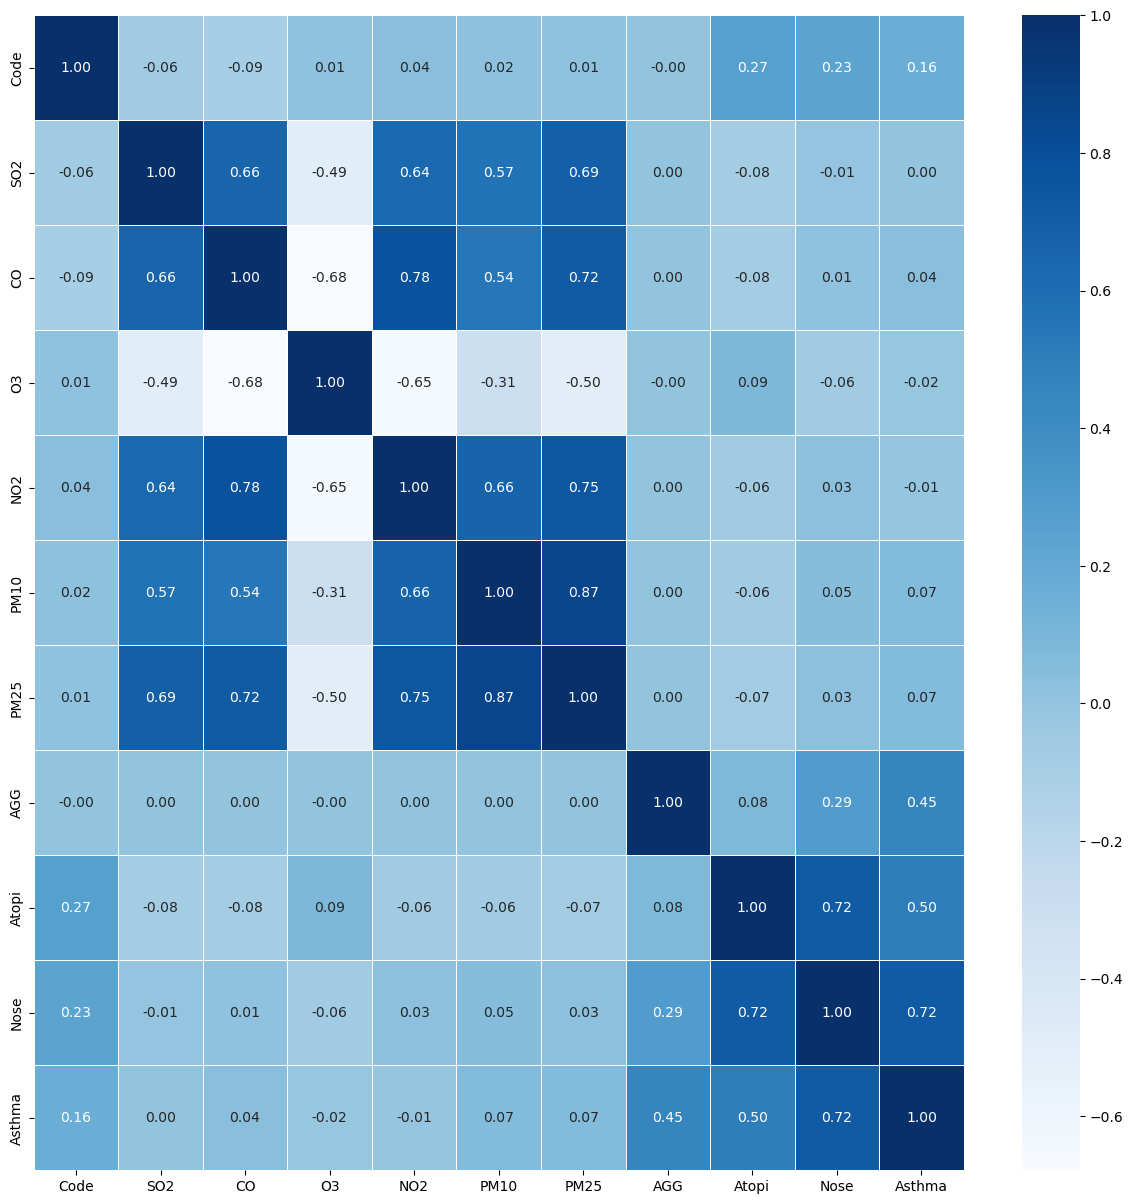

In [700]:
import matplotlib.pyplot as plt 
import seaborn as sns

plt.figure(figsize=(15,15))
sns.heatmap(data=merged_df.corr(numeric_only=True), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues')

## 미세먼지와 질병의 관계
- 미세먼지가 많다고해서 질병에 더 걸리거나, 적게 걸리거나 하는 경우는 거이 미미하다.
- 미세먼지와 질병의 관계는 생각보다 큰 상관관계는 없는 것으로 보인다.

In [701]:
merged_df['Area'].unique().tolist()

['서울 강남구',
 '서울 강동구',
 '서울 강북구',
 '서울 강서구',
 '서울 관악구',
 '서울 광진구',
 '서울 구로구',
 '서울 금천구',
 '서울 노원구',
 '서울 도봉구',
 '서울 동대문구',
 '서울 동작구',
 '서울 마포구',
 '서울 서대문구',
 '서울 서초구',
 '서울 성동구',
 '서울 성북구',
 '서울 송파구',
 '서울 양천구',
 '서울 영등포구',
 '서울 용산구',
 '서울 은평구',
 '서울 종로구',
 '서울 중구',
 '서울 중랑구']

In [702]:
merged_df['Area'].replace({'서울 강남구': 'Gangnam', '서울 강동구' : 'Gangdong', '서울 강북구' : 'Gangbuk', '서울 강서구' : 'Gangseo',
                            '서울 관악구' : 'Gwanak', '서울 광진구' : 'Gwangjin', '서울 구로구' : 'Guro', '서울 금천구' : 'Geumcheon',
                            '서울 노원구' : 'Nowon', '서울 도봉구' : 'Dobong', '서울 동대문구' : 'Dongdaemoon', '서울 동작구' : 'Dongjak',
                            '서울 마포구' : 'Mapo', '서울 서대문구' : 'Seodaemoon', '서울 서초구' : 'Seocho', '서울 성동구' : 'Seongdong',
                            '서울 성북구' : 'Seongbuk', '서울 송파구' : 'Songpa', '서울 양천구' : 'Yangcheon', '서울 영등포구' : 'Yeongdeungpo',
                            '서울 용산구' : 'Yongsan', '서울 은평구' : 'Eunpyeong', '서울 종로구' : 'Jongro', '서울 중구' : 'Junggu', 
                            '서울 중랑구' : 'Jungrang'}, inplace=True)

## 서울시 구 수정
- 그래프를 출력하기 위해서, 한글명이 아닌 영문명으로 데이터 전처리가 필요하여, 서울시의 지역을 영문으로 이름을 변경한다.

In [703]:
merged_df

,Month,Area,Code,SO2,CO,O3,NO2,PM10,PM25,AGG,Atopi,Nose,Asthma
0,2020-01,Gangnam,111262.0,0.003452,0.920034,0.013274,0.038058,45.033130,28.792244,0,245,848,293
1,2020-01,Gangnam,111262.0,0.003452,0.920034,0.013274,0.038058,45.033130,28.792244,1,204,1422,281
2,2020-01,Gangnam,111262.0,0.003452,0.920034,0.013274,0.038058,45.033130,28.792244,2,163,1463,95
3,2020-01,Gangnam,111262.0,0.003452,0.920034,0.013274,0.038058,45.033130,28.792244,3,594,9008,519
4,2020-01,Gangnam,111262.0,0.003452,0.920034,0.013274,0.038058,45.033130,28.792244,4,284,6435,428
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5393,2022-12,Jungrang,111151.0,0.002923,0.493052,0.018791,0.026081,45.378608,24.611249,1,111,1444,71
5394,2022-12,Jungrang,111151.0,0.002923,0.493052,0.018791,0.026081,45.378608,24.611249,2,42,998,54
5395,2022-12,Jungrang,111151.0,0.002923,0.493052,0.018791,0.026081,45.378608,24.611249,3,304,5996,336
5396,2022-12,Jungrang,111151.0,0.002923,0.493052,0.018791,0.026081,45.378608,24.611249,4,132,3838,327


## 각 구별 평균 데이터 만들기
- 각 구별로 3년간의 평균 데이터 프레임을 새로 만들어서 그래프로 출력할 예정이다.

In [704]:
average_df = merged_df.groupby(['Area']).mean(numeric_only=True).reset_index()

In [705]:
average_df

,Area,Code,SO2,CO,O3,NO2,PM10,PM25,AGG,Atopi,Nose,Asthma
0,Dobong,111171.0,0.002927,0.419601,0.032817,0.016452,35.624578,18.866097,2.500000,124.009259,1277.236111,135.375000
1,Dongdaemoon,111153.0,0.003230,0.477374,0.029715,0.026649,38.111360,19.930300,2.500000,173.259259,1460.439815,152.129630
2,Dongjak,111241.5,0.003178,0.451573,0.028858,0.027996,40.897884,20.831806,2.500000,215.763889,1543.268519,142.240741
3,Eunpyeong,111181.0,0.003183,0.467960,0.035861,0.017083,37.765382,20.779964,2.500000,295.453704,2027.004630,246.444444
4,Gangbuk,111291.0,0.002870,0.420334,0.032391,0.018909,40.719341,21.108871,2.500000,144.990741,1227.041667,123.194444
5,Gangdong,111274.5,0.003164,0.457187,0.026743,0.026134,40.670548,20.243175,2.500000,323.180556,2029.921296,172.240741
6,Gangnam,111262.0,0.003177,0.567891,0.027619,0.027068,38.961549,20.154879,2.500000,316.375000,2158.495370,191.532407
7,Gangseo,111212.5,0.003412,0.450258,0.030745,0.025711,42.263437,21.139163,2.500000,326.787037,2494.212963,189.527778
8,Geumcheon,111281.5,0.003527,0.498723,0.027480,0.031270,41.427865,22.459216,2.500000,102.231481,986.162037,62.495370
9,Guro,111221.0,0.003189,0.365986,0.034542,0.019329,40.228121,19.410771,2.500000,175.750000,1888.750000,141.606481


## 데이터 삭제
- 추후에 사용할 그래프에서 필요없을거같은 데이터들을 삭제 시키고 새로운 데이터 프레임을 미리 만든다.

In [706]:
average_df = average_df.drop(['Code','AGG'], axis=1)

In [707]:
clean_average = average_df.drop(['Atopi', 'Nose', 'Asthma','PM10', 'PM25', 'CO'], axis=1)

In [708]:
clean_average

,Area,SO2,O3,NO2
0,Dobong,0.002927,0.032817,0.016452
1,Dongdaemoon,0.003230,0.029715,0.026649
2,Dongjak,0.003178,0.028858,0.027996
3,Eunpyeong,0.003183,0.035861,0.017083
4,Gangbuk,0.002870,0.032391,0.018909
5,Gangdong,0.003164,0.026743,0.026134
6,Gangnam,0.003177,0.027619,0.027068
7,Gangseo,0.003412,0.030745,0.025711
8,Geumcheon,0.003527,0.027480,0.031270
9,Guro,0.003189,0.034542,0.019329


C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


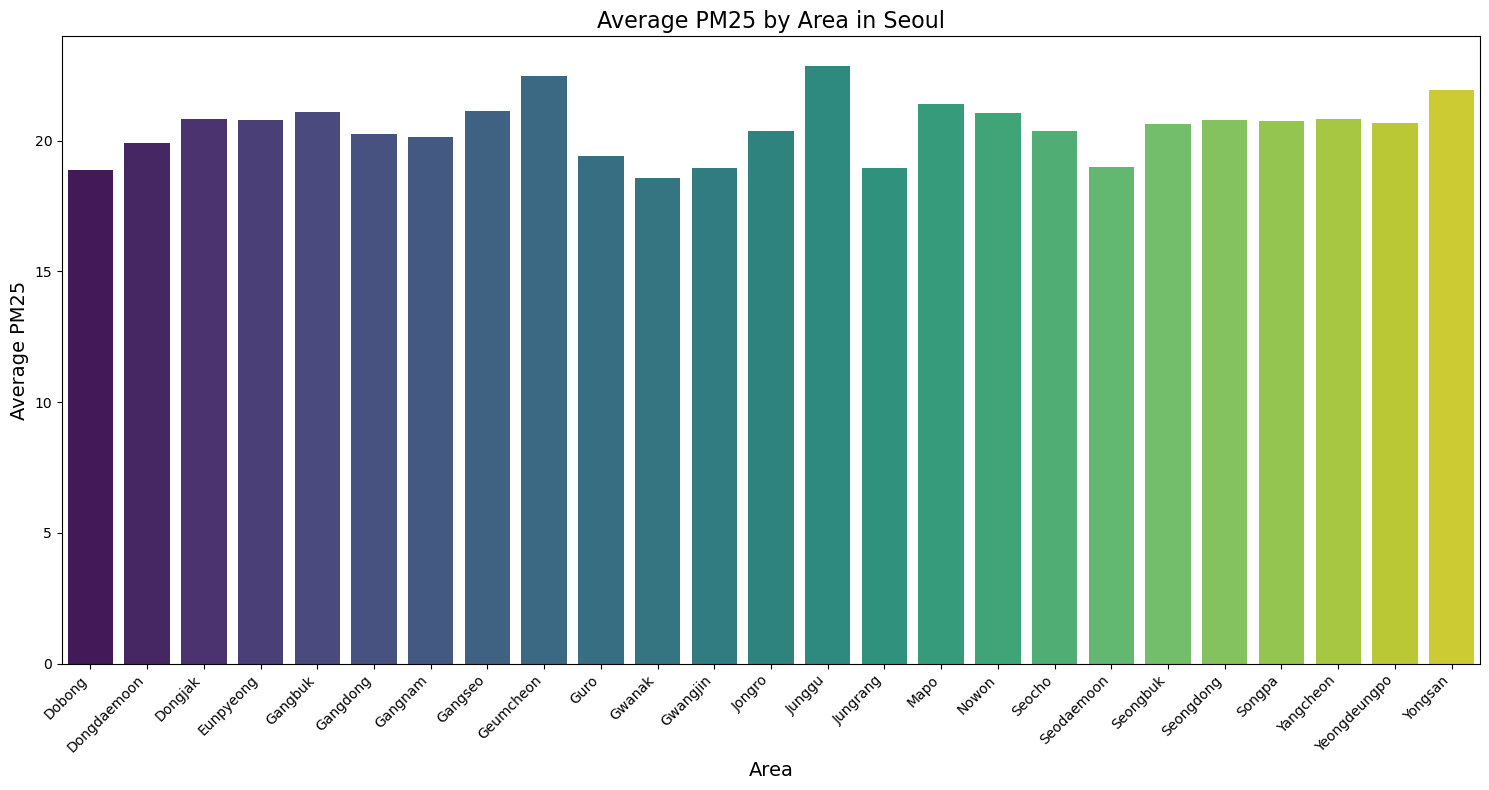

In [709]:
plt.figure(figsize=(15, 8))

sns.barplot(data=average_df, x='Area', y='PM25', palette='viridis')

plt.title('Average PM25 by Area in Seoul', fontsize=16)
plt.xlabel('Area', fontsize=14)
plt.ylabel('Average PM25', fontsize=14)

# 그래프 출력
plt.xticks(rotation=45, ha='right')  # X축 라벨들을 회전하여 가로로 출력
plt.tight_layout()  # 레이아웃 조정
plt.show()

## 각 구별 초미세먼지 그래프
- 중구가 평균적으로 많은 초미세먼지가 있다. 용산에 경우에도 꽤 높은 수치이다.
- 그렇다면 이곳에 환자들이 많은편일까?

C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categor

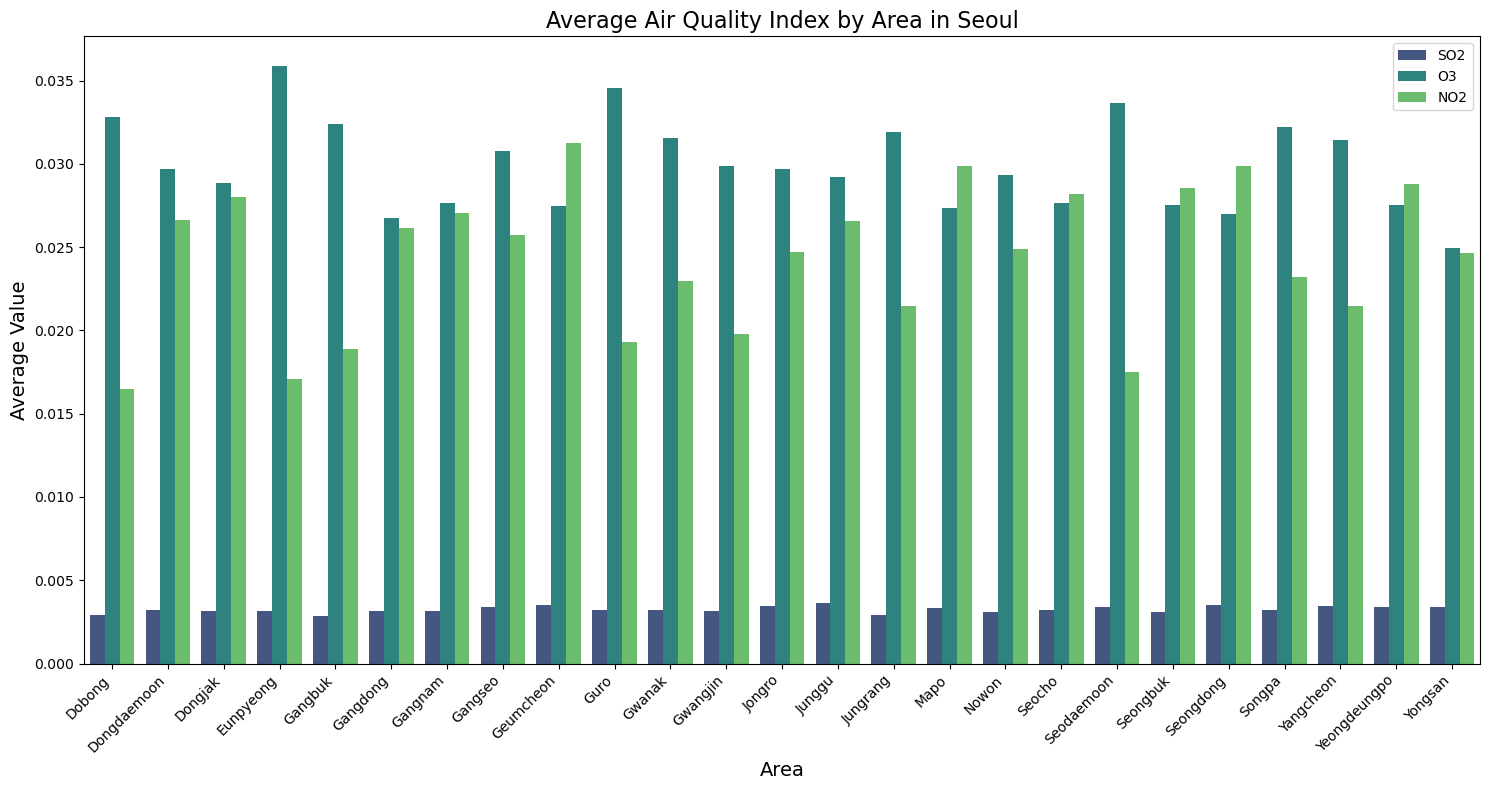

In [710]:
plt.figure(figsize=(15, 8))

# Melt 함수를 사용하여 데이터를 'variable' 및 'value' 열로 변환
melted_data = pd.melt(clean_average, id_vars='Area', var_name='Pollutant', value_name='Average Value')

# Bar Plot 그리기
sns.barplot(data=melted_data, x='Area', y='Average Value', hue='Pollutant', palette='viridis')

# 그래프 제목과 라벨 설정
plt.title('Average Air Quality Index by Area in Seoul', fontsize=16)
plt.xlabel('Area', fontsize=14)
plt.ylabel('Average Value', fontsize=14)

# 범례 위치 조정
plt.legend(loc='upper right')

# 그래프 출력
plt.xticks(rotation=45, ha='right')  # X축 라벨들을 회전하여 가로로 출력
plt.tight_layout()  # 레이아웃 조정
plt.show()

## 각 구별 대기오염 수치 비교
- 지나치게 눈에띌 정도로 높은 지역은 은평구의 O3 수치이다.
- 그외에는 서로 미세먼지의 농도가 비슷한 편이다.

In [711]:
disease_df = average_df.drop(['CO','SO2','O3','NO2','PM10','PM25'], axis=1)

C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categor

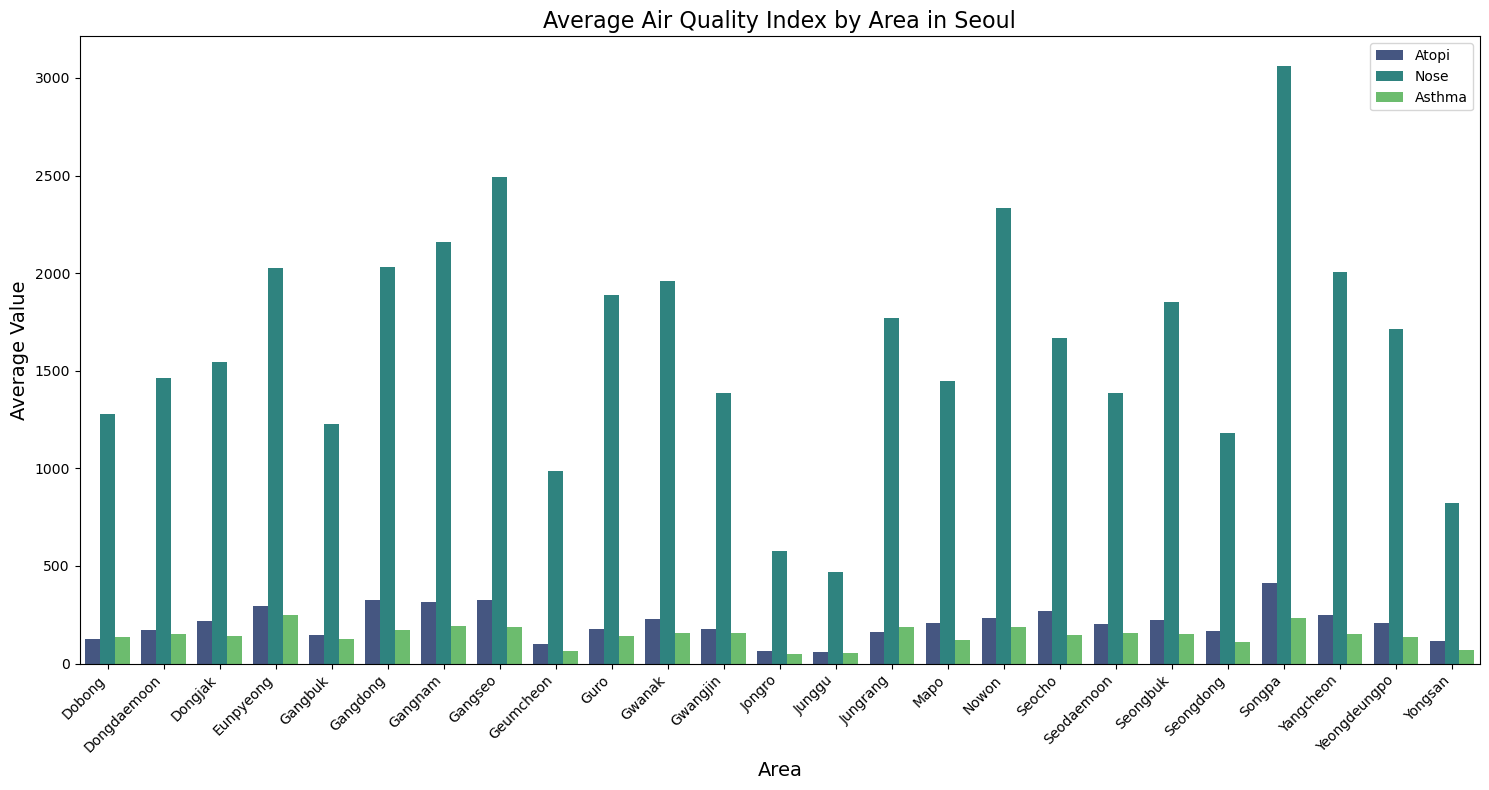

In [712]:
plt.figure(figsize=(15, 8))

# Melt 함수를 사용하여 데이터를 'variable' 및 'value' 열로 변환
melted_data = pd.melt(disease_df, id_vars='Area', var_name='Pollutant', value_name='Average Value')

# Bar Plot 그리기
sns.barplot(data=melted_data, x='Area', y='Average Value', hue='Pollutant', palette='viridis')

# 그래프 제목과 라벨 설정
plt.title('Average Air Quality Index by Area in Seoul', fontsize=16)
plt.xlabel('Area', fontsize=14)
plt.ylabel('Average Value', fontsize=14)

# 범례 위치 조정
plt.legend(loc='upper right')

# 그래프 출력
plt.xticks(rotation=45, ha='right')  # X축 라벨들을 회전하여 가로로 출력
plt.tight_layout()  # 레이아웃 조정
plt.show()

## 각 구별 질병 비교 그래프
- 송파구 쪽이 유독 환자가 많은편인데, 송파의 미세먼지 수치는 그렇게 높은편이 아님에도 환자가 많은것으로보아,
- 미세먼지가 호흡기에 주는 악효과는 생각보다 적을 수도 있다는 결론이 내려진다.

<Axes: >

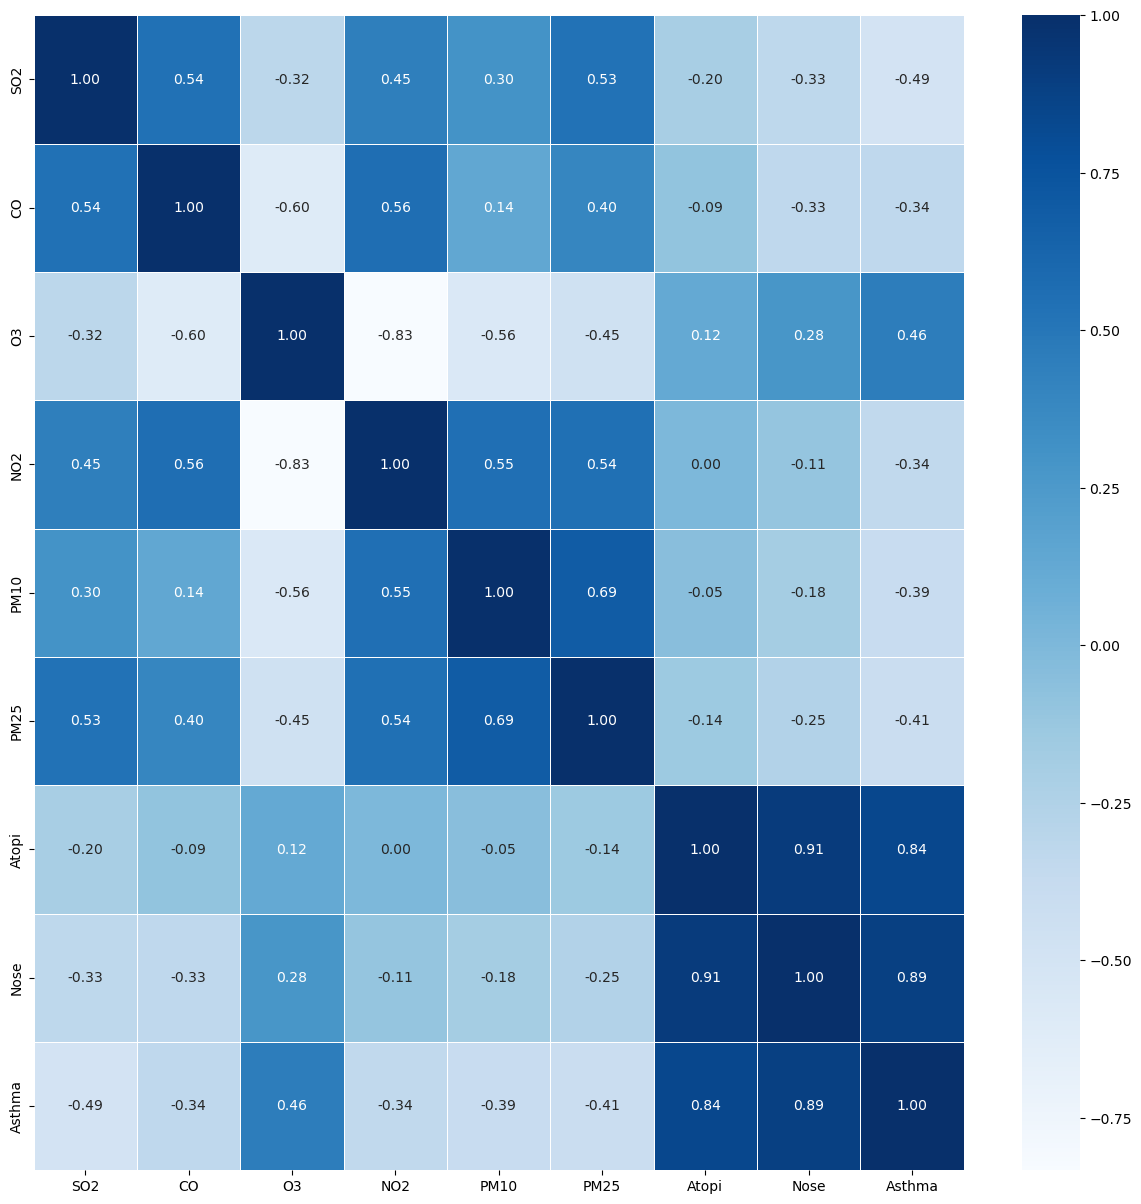

In [713]:
import matplotlib.pyplot as plt 
import seaborn as sns

plt.figure(figsize=(15,15))
sns.heatmap(data=average_df.corr(numeric_only=True), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues')

## 달라진 상관관계
- 구별 평균으로 나눈 데이터에서는 O3 수치가 높을수록 호흡기 질환이 많아지는 것이 확인되고 있다.
- 다른 미세먼지들은 많아질수록 오히려 질병이 줄어드는 음의상관관계가 많은것으로 보았을 때,
- 직접적으로 질병의 원인이 있을 것으로 예상되는 먼지는 O3 일수도 있다는 예상을 할 수 있다.

## O3
- O3는 오존수치 인데, 오존수치가 늘어나면 미세먼지가 줄어들고, 질병이 늘어난다.
- 이번에는 구 별로 아니고 월별로 통합된 데이터가 필요하다.

In [714]:
month_df = merged_df.groupby(['Month']).mean(numeric_only=True).reset_index()

In [715]:
month_df

,Month,Code,SO2,CO,O3,NO2,PM10,PM25,AGG,Atopi,Nose,Asthma
0,2020-01,111211.260000,0.004302,0.741833,0.014363,0.035675,50.830096,32.434187,2.50000,186.620000,2955.153333,292.340000
1,2020-02,111211.260000,0.003632,0.603192,0.019321,0.032031,50.827514,32.964755,2.50000,164.480000,1639.026667,189.660000
2,2020-03,111211.260000,0.003523,0.467490,0.028235,0.027097,49.566096,25.559802,2.50000,182.520000,1097.326667,138.620000
3,2020-04,111211.260000,0.003295,0.399660,0.040529,0.020632,50.705199,21.327943,2.50000,207.733333,1080.906667,122.586667
4,2020-05,111211.260000,0.002871,0.406773,0.037387,0.021463,37.031110,17.973701,2.50000,227.093333,1523.660000,142.940000
5,2020-06,111211.260000,0.003098,0.455527,0.048146,0.025066,42.439468,21.615583,2.50000,232.806667,1119.340000,115.460000
6,2020-07,111211.260000,0.002620,0.404302,0.032430,0.019228,20.332570,12.145909,2.50000,206.320000,1042.673333,107.146667
7,2020-08,111211.260000,0.002805,0.352739,0.019581,0.017273,24.359306,15.235811,2.50000,219.306667,1014.340000,98.053333
8,2020-09,111211.260000,0.002840,0.386158,0.031379,0.016709,20.304586,10.143227,2.50000,230.260000,1726.420000,132.620000
9,2020-10,111211.260000,0.003495,0.492477,0.027555,0.023302,38.006078,18.137822,2.50000,214.733333,1575.400000,131.606667


In [716]:
month_df = month_df.drop(['Code','AGG'], axis=1)

In [717]:
clean_month = month_df.drop(['Atopi', 'Nose', 'Asthma','PM10', 'PM25', 'CO'], axis=1)

<Axes: >

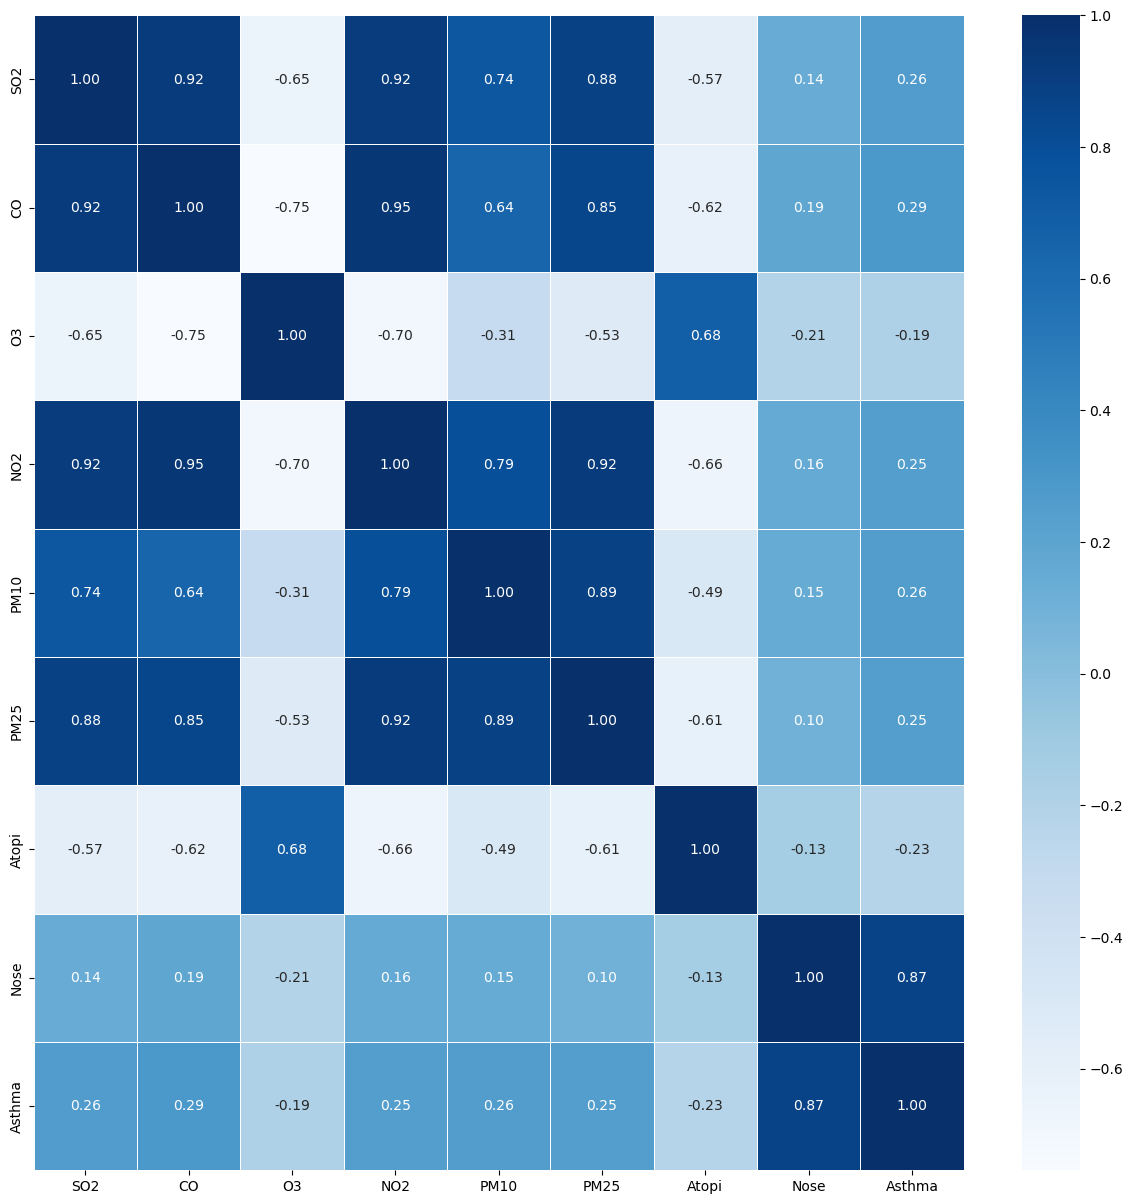

In [718]:
import matplotlib.pyplot as plt 
import seaborn as sns

plt.figure(figsize=(15,15))
sns.heatmap(data=month_df.corr(numeric_only=True), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues')

## 상관관계 분석
- 월별로 보았을 때에는 미세먼지 수치가 늘어날수록 질병도 꾸준히 증가하고 있음을 알 수 있다.

C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


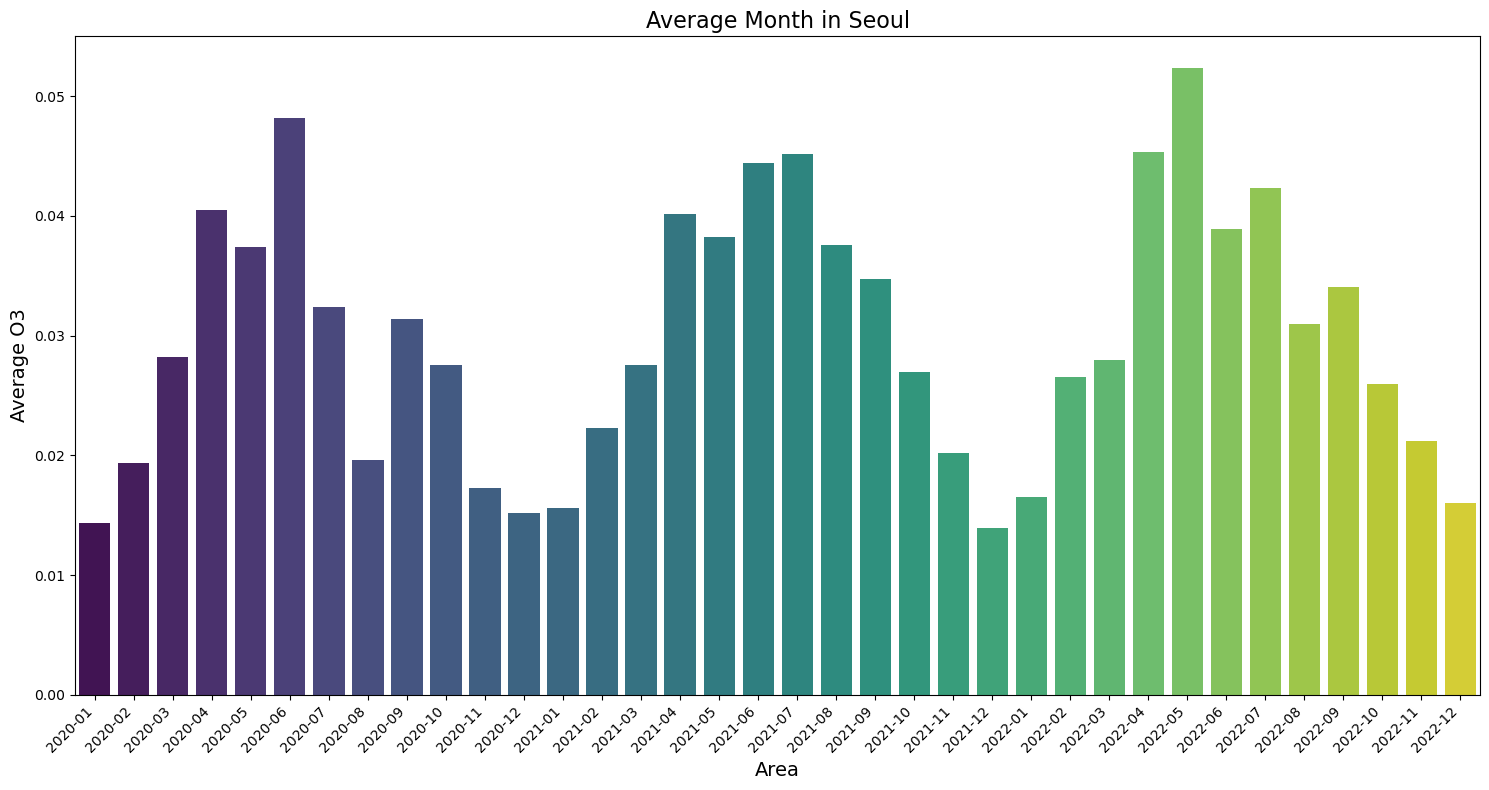

In [719]:
plt.figure(figsize=(15, 8))

sns.barplot(data=month_df, x='Month', y='O3', palette='viridis')

plt.title('Average Month in Seoul', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Average O3', fontsize=14)

# 그래프 출력
plt.xticks(rotation=45, ha='right')  # X축 라벨들을 회전하여 가로로 출력
plt.tight_layout()  # 레이아웃 조정
plt.show()

C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


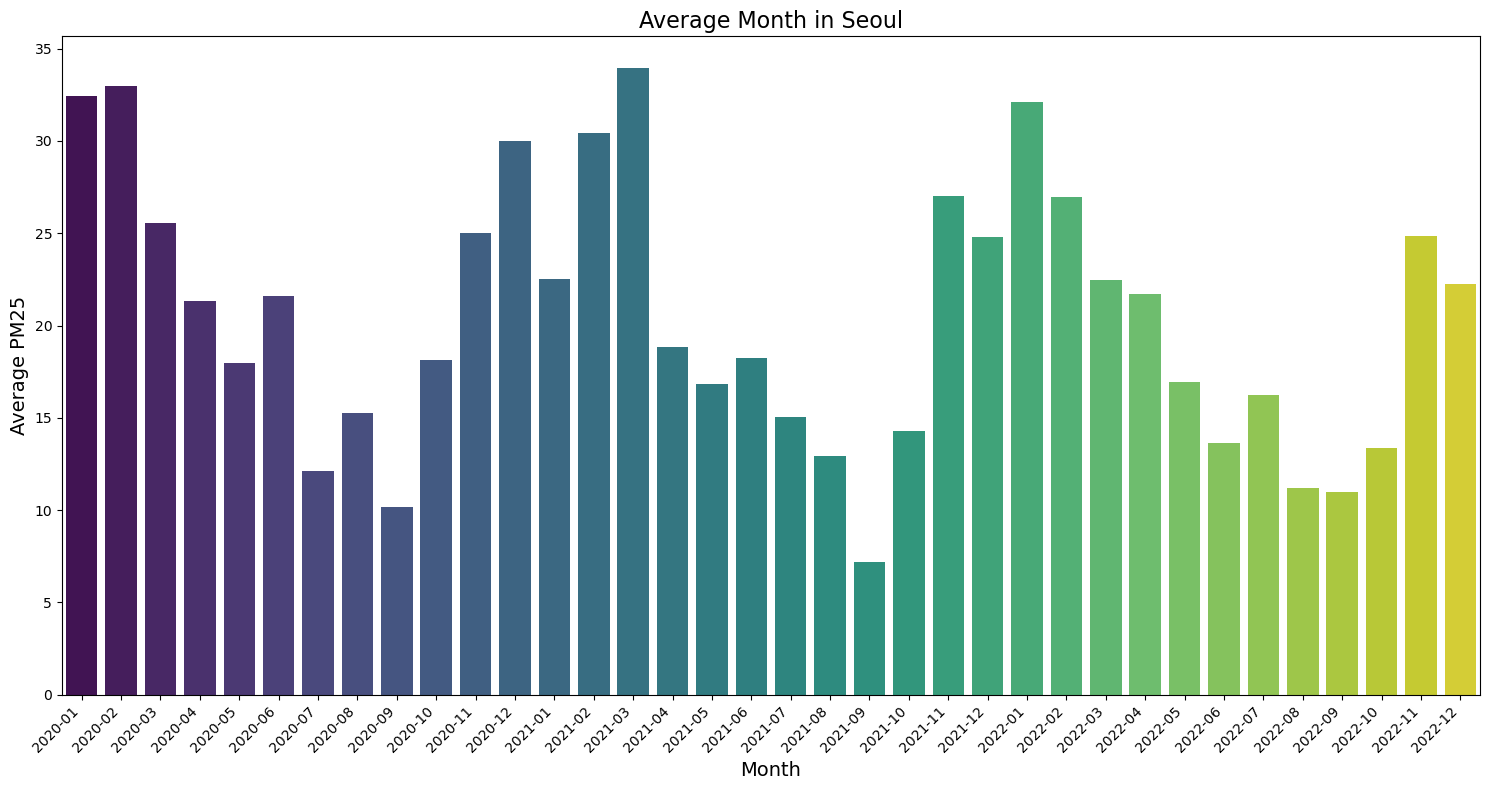

In [795]:
plt.figure(figsize=(15, 8))

sns.barplot(data=month_df, x='Month', y='PM25', palette='viridis')

plt.title('Average Month in Seoul', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Average PM25', fontsize=14)

# 그래프 출력
plt.xticks(rotation=45, ha='right')  # X축 라벨들을 회전하여 가로로 출력
plt.tight_layout()  # 레이아웃 조정
plt.show()

## 각 월별 오존수치
- 4,5월 쯔음에 오존수치가 보통은 1년주기중에서 가장 높은편에 속하고, 겨울은 전체적으로 오존수치가 낮은편이다.
- 22년도 5월에 가장 높은 오존수치인것으로 보았을 때, 향후에도 높아질 가능성은 있다.

## 예측 모델 만들기

In [720]:
merged_df = merged_df.drop(['Code'], axis=1)

In [721]:
df = pd.DataFrame(merged_df)

## 선형회귀
- 처음으로 선형회귀를 진행하고, 나중에 추가적으로 더 적합한 모델을 찾아보자. 우선은 데이터 표준화부터 진행한다.

In [722]:
from sklearn.preprocessing import StandardScaler

# 수치형 변수 선택
numerical_columns = ['PM25', 'PM10', 'SO2', 'CO', 'O3', 'NO2']

# 표준화 진행
ss = StandardScaler()
df[numerical_columns] = ss.fit_transform(df[numerical_columns])

# 결과 확인
print(df.head())

     Month     Area       SO2        CO        O3       NO2      PM10  \
0  2020-01  Gangnam  0.337226  3.623843 -1.469338  1.816659  0.447605   
1  2020-01  Gangnam  0.337226  3.623843 -1.469338  1.816659  0.447605   
2  2020-01  Gangnam  0.337226  3.623843 -1.469338  1.816659  0.447605   
3  2020-01  Gangnam  0.337226  3.623843 -1.469338  1.816659  0.447605   
4  2020-01  Gangnam  0.337226  3.623843 -1.469338  1.816659  0.447605   

       PM25  AGG  Atopi  Nose  Asthma  
0  1.121056    0    245   848     293  
1  1.121056    1    204  1422     281  
2  1.121056    2    163  1463      95  
3  1.121056    3    594  9008     519  
4  1.121056    4    284  6435     428  


In [723]:
merged_df

,Month,Area,SO2,CO,O3,NO2,PM10,PM25,AGG,Atopi,Nose,Asthma
0,2020-01,Gangnam,0.003452,0.920034,0.013274,0.038058,45.033130,28.792244,0,245,848,293
1,2020-01,Gangnam,0.003452,0.920034,0.013274,0.038058,45.033130,28.792244,1,204,1422,281
2,2020-01,Gangnam,0.003452,0.920034,0.013274,0.038058,45.033130,28.792244,2,163,1463,95
3,2020-01,Gangnam,0.003452,0.920034,0.013274,0.038058,45.033130,28.792244,3,594,9008,519
4,2020-01,Gangnam,0.003452,0.920034,0.013274,0.038058,45.033130,28.792244,4,284,6435,428
...,...,...,...,...,...,...,...,...,...,...,...,...
5393,2022-12,Jungrang,0.002923,0.493052,0.018791,0.026081,45.378608,24.611249,1,111,1444,71
5394,2022-12,Jungrang,0.002923,0.493052,0.018791,0.026081,45.378608,24.611249,2,42,998,54
5395,2022-12,Jungrang,0.002923,0.493052,0.018791,0.026081,45.378608,24.611249,3,304,5996,336
5396,2022-12,Jungrang,0.002923,0.493052,0.018791,0.026081,45.378608,24.611249,4,132,3838,327


In [724]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# 예측에 사용할 특성 선택 (예: PM10, SO2, CO, O3, NO2 등)
features = ['PM10', 'SO2', 'CO', 'O3', 'NO2']

# 종속 변수 선택 (예측하고자 하는 값)
target = 'PM25'

# 훈련 데이터와 테스트 데이터로 분리
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=42)

In [725]:
# 선형 회귀 모델 생성
lr = LinearRegression()

# 모델 훈련
lr.fit(X_train, y_train)

LinearRegression()

In [726]:
print(lr.score(X_train, y_train))
print(lr.score(X_test, y_test))

0.8558119129636244
0.8538708714645833


## 적합도
- 생각보다 높은 수치의 적합도가 나왔다. 특성을 여러개를 주었는데도, 굉장히 높은 수치이다.

In [727]:
y_pred = lr.predict(X_test)
y_pred

array([ 0.2195449 , -1.63261698, -0.80596434, ...,  0.0886351 ,
        1.50369267, -0.87283229])

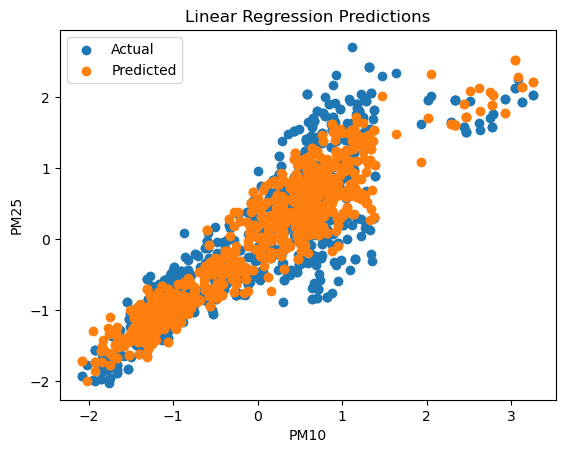

In [728]:
# 예측 결과와 실제값의 산점도 그래프
plt.scatter(X_test['PM10'], y_test, label='Actual')
plt.scatter(X_test['PM10'], y_pred, label='Predicted')
plt.xlabel('PM10')
plt.ylabel('PM25')
plt.legend()
plt.title('Linear Regression Predictions')
plt.show()

## PM10에 따른 PM25 수치 예측
- 파란색이 실제 데이터 값이고 주황색이 예측 데이터 값이다.
- 생각보다 잘 맞춰서 선형회귀가 의외로 성능적으로 우수했다.

In [729]:
merged_df

,Month,Area,SO2,CO,O3,NO2,PM10,PM25,AGG,Atopi,Nose,Asthma
0,2020-01,Gangnam,0.003452,0.920034,0.013274,0.038058,45.033130,28.792244,0,245,848,293
1,2020-01,Gangnam,0.003452,0.920034,0.013274,0.038058,45.033130,28.792244,1,204,1422,281
2,2020-01,Gangnam,0.003452,0.920034,0.013274,0.038058,45.033130,28.792244,2,163,1463,95
3,2020-01,Gangnam,0.003452,0.920034,0.013274,0.038058,45.033130,28.792244,3,594,9008,519
4,2020-01,Gangnam,0.003452,0.920034,0.013274,0.038058,45.033130,28.792244,4,284,6435,428
...,...,...,...,...,...,...,...,...,...,...,...,...
5393,2022-12,Jungrang,0.002923,0.493052,0.018791,0.026081,45.378608,24.611249,1,111,1444,71
5394,2022-12,Jungrang,0.002923,0.493052,0.018791,0.026081,45.378608,24.611249,2,42,998,54
5395,2022-12,Jungrang,0.002923,0.493052,0.018791,0.026081,45.378608,24.611249,3,304,5996,336
5396,2022-12,Jungrang,0.002923,0.493052,0.018791,0.026081,45.378608,24.611249,4,132,3838,327


In [730]:
from sklearn.preprocessing import StandardScaler

# 수치형 변수 선택
numerical_columns = ['PM25', 'PM10', 'SO2', 'CO', 'O3', 'NO2', 'Atopi', 'Nose', 'Asthma']

# 표준화 진행
ss = StandardScaler()
df[numerical_columns] = ss.fit_transform(df[numerical_columns])

# 결과 확인
print(merged_df.head())

     Month     Area       SO2        CO        O3       NO2      PM10  \
0  2020-01  Gangnam  0.003452  0.920034  0.013274  0.038058  45.03313   
1  2020-01  Gangnam  0.003452  0.920034  0.013274  0.038058  45.03313   
2  2020-01  Gangnam  0.003452  0.920034  0.013274  0.038058  45.03313   
3  2020-01  Gangnam  0.003452  0.920034  0.013274  0.038058  45.03313   
4  2020-01  Gangnam  0.003452  0.920034  0.013274  0.038058  45.03313   

        PM25  AGG  Atopi  Nose  Asthma  
0  28.792244    0    245   848     293  
1  28.792244    1    204  1422     281  
2  28.792244    2    163  1463      95  
3  28.792244    3    594  9008     519  
4  28.792244    4    284  6435     428  


In [731]:
merged_df

,Month,Area,SO2,CO,O3,NO2,PM10,PM25,AGG,Atopi,Nose,Asthma
0,2020-01,Gangnam,0.003452,0.920034,0.013274,0.038058,45.033130,28.792244,0,245,848,293
1,2020-01,Gangnam,0.003452,0.920034,0.013274,0.038058,45.033130,28.792244,1,204,1422,281
2,2020-01,Gangnam,0.003452,0.920034,0.013274,0.038058,45.033130,28.792244,2,163,1463,95
3,2020-01,Gangnam,0.003452,0.920034,0.013274,0.038058,45.033130,28.792244,3,594,9008,519
4,2020-01,Gangnam,0.003452,0.920034,0.013274,0.038058,45.033130,28.792244,4,284,6435,428
...,...,...,...,...,...,...,...,...,...,...,...,...
5393,2022-12,Jungrang,0.002923,0.493052,0.018791,0.026081,45.378608,24.611249,1,111,1444,71
5394,2022-12,Jungrang,0.002923,0.493052,0.018791,0.026081,45.378608,24.611249,2,42,998,54
5395,2022-12,Jungrang,0.002923,0.493052,0.018791,0.026081,45.378608,24.611249,3,304,5996,336
5396,2022-12,Jungrang,0.002923,0.493052,0.018791,0.026081,45.378608,24.611249,4,132,3838,327


In [732]:
# 'Season' 컬럼 추가
merged_df['Season'] = (merged_df['Month'].dt.month % 12 + 3) // 3
season_dict = {1: 'Winter', 2: 'Spring', 3: 'Summer', 4: 'Fall'}
merged_df['Season'] = merged_df['Season'].map(season_dict)

# 계절별 데이터 그룹화
seasonal_groups = merged_df.groupby('Season')

# 각 계절에 대한 데이터 확인
for season, group in seasonal_groups:
    print(f"Season: {season}")
    print(group)
    print("\n")
    
# 'Season' 컬럼 추가
df['Season'] = (df['Month'].dt.month % 12 + 3) // 3
season_dict = {1: 'Winter', 2: 'Spring', 3: 'Summer', 4: 'Fall'}
df['Season'] = df['Season'].map(season_dict)

# 계절별 데이터 그룹화
seasonal_groups = merged_df.groupby('Season')

Season: Fall
        Month      Area       SO2        CO        O3       NO2       PM10  \
1200  2020-09   Gangnam  0.002917  0.501667  0.027117  0.020300  20.934314   
1201  2020-09   Gangnam  0.002917  0.501667  0.027117  0.020300  20.934314   
1202  2020-09   Gangnam  0.002917  0.501667  0.027117  0.020300  20.934314   
1203  2020-09   Gangnam  0.002917  0.501667  0.027117  0.020300  20.934314   
1204  2020-09   Gangnam  0.002917  0.501667  0.027117  0.020300  20.934314   
...       ...       ...       ...       ...       ...       ...        ...   
5243  2022-11  Jungrang  0.003000  0.456667  0.025667  0.026367  42.433333   
5244  2022-11  Jungrang  0.003000  0.456667  0.025667  0.026367  42.433333   
5245  2022-11  Jungrang  0.003000  0.456667  0.025667  0.026367  42.433333   
5246  2022-11  Jungrang  0.003000  0.456667  0.025667  0.026367  42.433333   
5247  2022-11  Jungrang  0.003000  0.456667  0.025667  0.026367  42.433333   

           PM25  AGG  Atopi  Nose  Asthma Season  

## 계절 데이터 추가
- 이번엔 로지스틱을 활용해서 미세먼지와, 대기오염 데이터로 계절을 예측모델을 만들어 볼 것 이다.
- 각 계절 별로 
- 3월~5월 : 봄
- 6월~8월 : 여름
- 9월~11월 : 가을
- 12월-2월 : 겨울

In [733]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

# 예측에 사용할 특성 선택
features = ['SO2', 'CO', 'O3', 'NO2', 'PM10', 'PM25']

# 종속 변수 선택
target = 'Season'

# 훈련 데이터와 테스트 데이터로 분리
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.4, random_state=42)

# 로지스틱 회귀 모델 초기화
model = LogisticRegression()

# 모델 훈련
model.fit(X_train, y_train)

LogisticRegression()

In [734]:
# 테스트 데이터로 예측
y_pred = model.predict(X_test)
y_pred

array(['Spring', 'Summer', 'Fall', ..., 'Spring', 'Summer', 'Summer'],
      dtype=object)

In [735]:
# 훈련 데이터와 테스트 데이터셋에 대한 점수 확인
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.7554045707226683
0.7416666666666667


- 생각보다 적당한 스코어의 데이터를 취합하는데 성공했다.
- 이제 혼동행렬과 분류 보고서를 출력해서 비교해보자.

In [736]:
from sklearn.metrics import classification_report

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# 분류 보고서 출력
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

Confusion Matrix:
[[284   6  91 150]
 [ 42 465  35   3]
 [ 92  47 395   8]
 [ 59   4  21 458]]
Classification Report:
              precision    recall  f1-score   support

        Fall       0.60      0.53      0.56       531
      Spring       0.89      0.85      0.87       545
      Summer       0.73      0.73      0.73       542
      Winter       0.74      0.85      0.79       542

    accuracy                           0.74      2160
   macro avg       0.74      0.74      0.74      2160
weighted avg       0.74      0.74      0.74      2160



In [737]:
# 예측 결과 및 실제 결과를 데이터프레임에 추가
prob_df = pd.DataFrame({
    'True_Season': y_test,
    'Predicted_Season': model.predict(X_test)
})

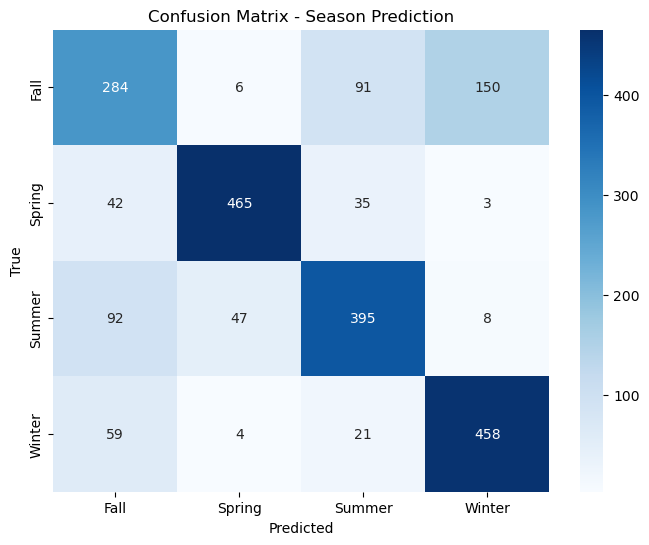

In [738]:
# Confusion Matrix
cm = confusion_matrix(prob_df['True_Season'], prob_df['Predicted_Season'])
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.title('Confusion Matrix - Season Prediction')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

## 예측이 잘되고 있는가
- 실제 데이터가 Y축 예측 데이터가 X축 히트맵을 찍어보았을 때,
- 대략 평균적으로 100개 정도의 데이터는 예측에 실패하고 있고 어느정도는 맞추고 있는 데이터이다.
- 다만 겨울로 예측된 데이터의 경우는 실제 데이터는 가을인데, 150개의 데이터가 겨울로 예측하고 있어서
- 가을의 겨울의 경우에는 예측이 빗나가는 경우가 더러 있다.

C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categor

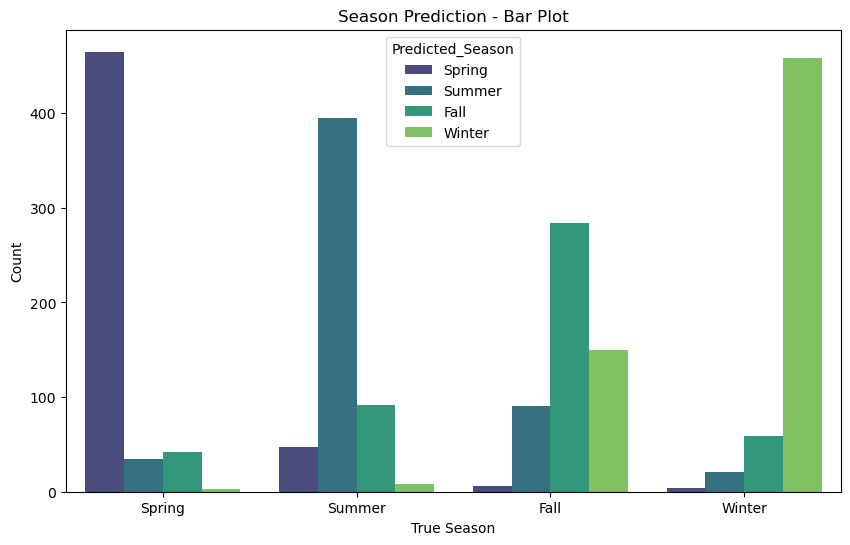

C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context

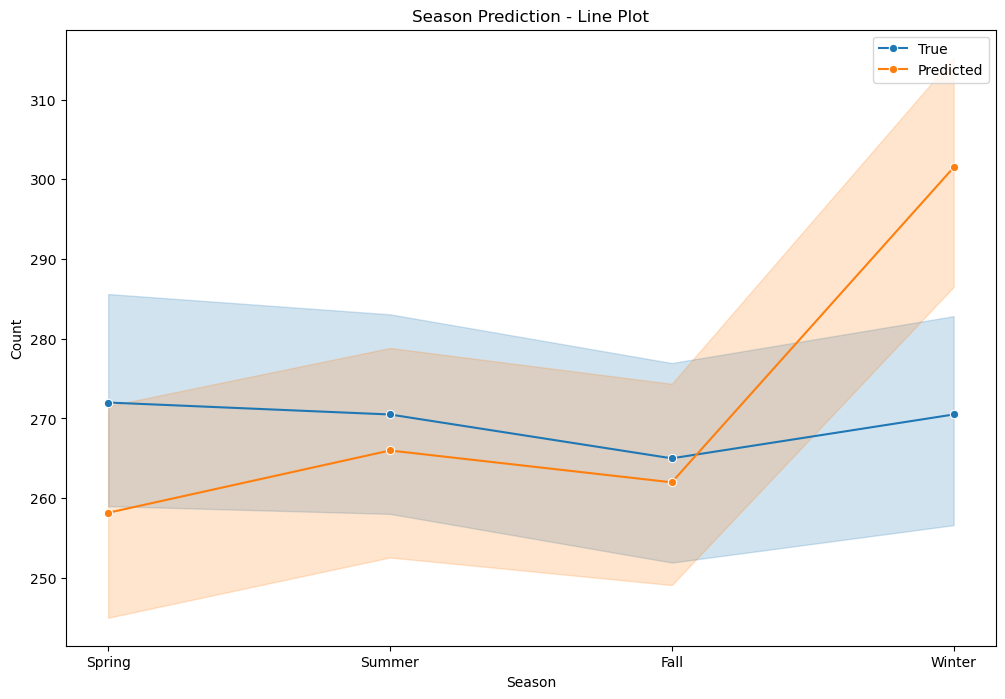

In [739]:
# Bar Plot
plt.figure(figsize=(10, 6))
sns.countplot(x='True_Season', hue='Predicted_Season', data=prob_df, palette='viridis')
plt.title('Season Prediction - Bar Plot')
plt.xlabel('True Season')
plt.ylabel('Count')
plt.show()

# Line Plot
plt.figure(figsize=(12, 8))
sns.lineplot(data=prob_df, x='True_Season', y=prob_df.groupby('True_Season').cumcount(), marker='o', label='True')
sns.lineplot(data=prob_df, x='True_Season', y=prob_df.groupby('Predicted_Season').cumcount(), marker='o', label='Predicted')
plt.title('Season Prediction - Line Plot')
plt.xlabel('Season')
plt.ylabel('Count')
plt.legend()
plt.show()

## 예측과 실제 데이터 시각화 비교
- 역시, 겨울을 제외한 나머지 데이터들은 어느정도 예측을 잘하고 있지만, 겨울의 경우는 예측된 데이터가 많이 빗나갔다.
- 로지스틱으로는 여기까지가 한계인거 같고, 다른방법으로 해결을 한다면 예측률을 높힐 수 있을 것 같다.

In [740]:
from sklearn.tree import DecisionTreeClassifier

# 예측에 사용할 특성 선택
features = ['SO2', 'CO', 'O3', 'NO2','PM25', 'PM10']

# 종속 변수 선택
target = 'Season'

# 훈련 데이터와 테스트 데이터로 분리
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.3, random_state=42)

# 로지스틱 회귀 모델 초기화
dt = DecisionTreeClassifier(max_depth = 10, random_state = 42)
# 모델 훈련
dt.fit(X_train, y_train)

print(dt.score(X_train, y_train))
print(dt.score(X_test, y_test))

0.9915299100052938
0.9864197530864197


## 결정트리 모델 사용
- 로지스틱 말고 이번에는 결정 트리를 활용해서 예측 모델을 생성해 볼 것이다.
- 스코어 점수가 너무 높아져서 깜짝 놀랐는데, 결국 트리가 고성능을 보이는 것 같다.

C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context

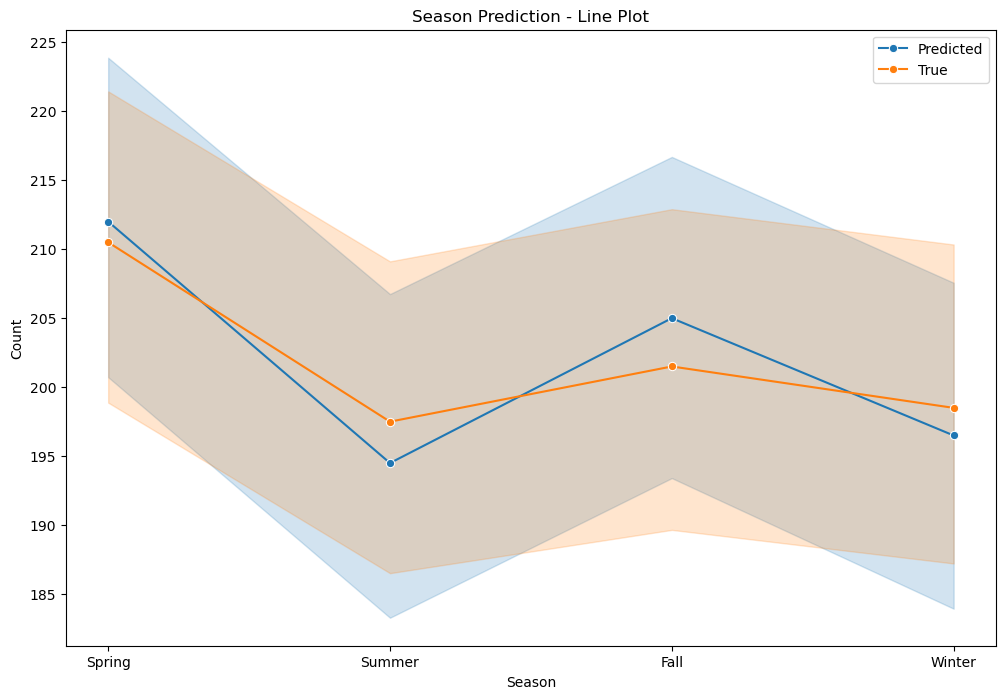

In [741]:
prob_df = pd.DataFrame({
    'True_Season': y_test,
    'Predicted_Season': dt.predict(X_test)
})

# Line Plot
plt.figure(figsize=(12, 8))
sns.lineplot(data=prob_df, x='Predicted_Season', y=prob_df.groupby('Predicted_Season').cumcount(), marker='o', label='Predicted')
sns.lineplot(data=prob_df, x='True_Season', y=prob_df.groupby('True_Season').cumcount(), marker='o', label='True')
plt.title('Season Prediction - Line Plot')
plt.xlabel('Season')
plt.ylabel('Count')
plt.legend()
plt.show()

## 모델 시각화
- 로지스틱을 사용했을 때 보다 훨씬더 계절 예측이 더 잘되었다. 계절 예측에는 로지스틱 보다는
- 트리를 사용하는 것이 훨씬 더 적합하다는 결론을 내릴 수 있었다.

In [742]:
merged_df

,Month,Area,SO2,CO,O3,NO2,PM10,PM25,AGG,Atopi,Nose,Asthma,Season
0,2020-01,Gangnam,0.003452,0.920034,0.013274,0.038058,45.033130,28.792244,0,245,848,293,Winter
1,2020-01,Gangnam,0.003452,0.920034,0.013274,0.038058,45.033130,28.792244,1,204,1422,281,Winter
2,2020-01,Gangnam,0.003452,0.920034,0.013274,0.038058,45.033130,28.792244,2,163,1463,95,Winter
3,2020-01,Gangnam,0.003452,0.920034,0.013274,0.038058,45.033130,28.792244,3,594,9008,519,Winter
4,2020-01,Gangnam,0.003452,0.920034,0.013274,0.038058,45.033130,28.792244,4,284,6435,428,Winter
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5393,2022-12,Jungrang,0.002923,0.493052,0.018791,0.026081,45.378608,24.611249,1,111,1444,71,Winter
5394,2022-12,Jungrang,0.002923,0.493052,0.018791,0.026081,45.378608,24.611249,2,42,998,54,Winter
5395,2022-12,Jungrang,0.002923,0.493052,0.018791,0.026081,45.378608,24.611249,3,304,5996,336,Winter
5396,2022-12,Jungrang,0.002923,0.493052,0.018791,0.026081,45.378608,24.611249,4,132,3838,327,Winter


In [743]:
df

,Month,Area,SO2,CO,O3,NO2,PM10,PM25,AGG,Atopi,Nose,Asthma,Season
0,2020-01,Gangnam,0.337226,3.623843,-1.469338,1.816659,0.447605,1.121056,0,0.232186,-0.555723,1.374731,Winter
1,2020-01,Gangnam,0.337226,3.623843,-1.469338,1.816659,0.447605,1.121056,1,-0.019065,-0.147368,1.263432,Winter
2,2020-01,Gangnam,0.337226,3.623843,-1.469338,1.816659,0.447605,1.121056,2,-0.270316,-0.118200,-0.461696,Winter
3,2020-01,Gangnam,0.337226,3.623843,-1.469338,1.816659,0.447605,1.121056,3,2.370882,5.249456,3.470854,Winter
4,2020-01,Gangnam,0.337226,3.623843,-1.469338,1.816659,0.447605,1.121056,4,0.471180,3.418975,2.626840,Winter
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5393,2022-12,Jungrang,-0.564025,0.098685,-0.981927,0.228148,0.473924,0.557064,1,-0.588976,-0.131717,-0.684293,Winter
5394,2022-12,Jungrang,-0.564025,0.098685,-0.981927,0.228148,0.473924,0.557064,2,-1.011813,-0.449010,-0.841966,Winter
5395,2022-12,Jungrang,-0.564025,0.098685,-0.981927,0.228148,0.473924,0.557064,3,0.593742,3.106662,1.773550,Winter
5396,2022-12,Jungrang,-0.564025,0.098685,-0.981927,0.228148,0.473924,0.557064,4,-0.460286,1.571420,1.690077,Winter


## 기온 데이터 추가
- 이번에는 기온 데이터를 추가시켜서, 계절에 대해 예측을 더 잘할 수 있도록 만들겠다.

In [744]:
import pandas as pd

temperature = pd.read_csv('기온.csv', encoding='cp949')
temperature

,Month,AVG (℃),AVG MAX (℃),MAX (℃),AVG MIN (℃),MIN (℃)
0,2020-01,1.6,5.9,11.9,-1.7,-6.5
1,2020-02,2.5,7.2,15.6,-1.3,-11.8
2,2020-03,7.7,13.3,20.6,2.6,-2.8
3,2020-04,11.1,16.6,23.8,6.3,1.9
4,2020-05,18.0,23.3,30.0,13.7,9.2
5,2020-06,23.9,29.0,35.4,19.9,14.8
6,2020-07,24.1,28.0,32.9,21.1,17.2
7,2020-08,26.5,29.3,34.5,24.4,21.5
8,2020-09,21.4,25.6,29.5,18.0,13.6
9,2020-10,14.3,19.5,23.6,9.6,3.2


In [745]:
temperature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Month        48 non-null     object 
 1   AVG (℃)      48 non-null     float64
 2   AVG MAX (℃)  48 non-null     float64
 3   MAX (℃)      48 non-null     float64
 4   AVG MIN (℃)  48 non-null     float64
 5   MIN (℃)      48 non-null     float64
dtypes: float64(5), object(1)
memory usage: 2.4+ KB


In [746]:
temperature['Month']= temperature['Month'].astype('str')
temperature['Month'] = pd.to_datetime(temperature['Month'])

In [747]:
temperature['Month'] = temperature['Month'].dt.to_period("M")

In [748]:
temperature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype    
---  ------       --------------  -----    
 0   Month        48 non-null     period[M]
 1   AVG (℃)      48 non-null     float64  
 2   AVG MAX (℃)  48 non-null     float64  
 3   MAX (℃)      48 non-null     float64  
 4   AVG MIN (℃)  48 non-null     float64  
 5   MIN (℃)      48 non-null     float64  
dtypes: float64(5), period[M](1)
memory usage: 2.4 KB


In [749]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5398 entries, 0 to 5397
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype    
---  ------  --------------  -----    
 0   Month   5398 non-null   period[M]
 1   Area    5398 non-null   object   
 2   SO2     5398 non-null   float64  
 3   CO      5398 non-null   float64  
 4   O3      5398 non-null   float64  
 5   NO2     5398 non-null   float64  
 6   PM10    5398 non-null   float64  
 7   PM25    5398 non-null   float64  
 8   AGG     5398 non-null   int64    
 9   Atopi   5398 non-null   int64    
 10  Nose    5398 non-null   int64    
 11  Asthma  5398 non-null   int64    
 12  Season  5398 non-null   object   
dtypes: float64(6), int64(4), object(2), period[M](1)
memory usage: 548.4+ KB


In [750]:
merged_df = pd.merge(merged_df, temperature, on=['Month'], how='inner')

In [751]:
merged_df

,Month,Area,SO2,CO,O3,NO2,PM10,PM25,AGG,Atopi,Nose,Asthma,Season,AVG (℃),AVG MAX (℃),MAX (℃),AVG MIN (℃),MIN (℃)
0,2020-01,Gangnam,0.003452,0.920034,0.013274,0.038058,45.033130,28.792244,0,245,848,293,Winter,1.6,5.9,11.9,-1.7,-6.5
1,2020-01,Gangnam,0.003452,0.920034,0.013274,0.038058,45.033130,28.792244,1,204,1422,281,Winter,1.6,5.9,11.9,-1.7,-6.5
2,2020-01,Gangnam,0.003452,0.920034,0.013274,0.038058,45.033130,28.792244,2,163,1463,95,Winter,1.6,5.9,11.9,-1.7,-6.5
3,2020-01,Gangnam,0.003452,0.920034,0.013274,0.038058,45.033130,28.792244,3,594,9008,519,Winter,1.6,5.9,11.9,-1.7,-6.5
4,2020-01,Gangnam,0.003452,0.920034,0.013274,0.038058,45.033130,28.792244,4,284,6435,428,Winter,1.6,5.9,11.9,-1.7,-6.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5393,2022-12,Jungrang,0.002923,0.493052,0.018791,0.026081,45.378608,24.611249,1,111,1444,71,Winter,-2.8,1.7,10.2,-6.6,-13.7
5394,2022-12,Jungrang,0.002923,0.493052,0.018791,0.026081,45.378608,24.611249,2,42,998,54,Winter,-2.8,1.7,10.2,-6.6,-13.7
5395,2022-12,Jungrang,0.002923,0.493052,0.018791,0.026081,45.378608,24.611249,3,304,5996,336,Winter,-2.8,1.7,10.2,-6.6,-13.7
5396,2022-12,Jungrang,0.002923,0.493052,0.018791,0.026081,45.378608,24.611249,4,132,3838,327,Winter,-2.8,1.7,10.2,-6.6,-13.7


In [752]:
merged_df = merged_df.drop(['AVG MAX (℃)','AVG MIN (℃)'], axis=1)

In [753]:
merged_df

,Month,Area,SO2,CO,O3,NO2,PM10,PM25,AGG,Atopi,Nose,Asthma,Season,AVG (℃),MAX (℃),MIN (℃)
0,2020-01,Gangnam,0.003452,0.920034,0.013274,0.038058,45.033130,28.792244,0,245,848,293,Winter,1.6,11.9,-6.5
1,2020-01,Gangnam,0.003452,0.920034,0.013274,0.038058,45.033130,28.792244,1,204,1422,281,Winter,1.6,11.9,-6.5
2,2020-01,Gangnam,0.003452,0.920034,0.013274,0.038058,45.033130,28.792244,2,163,1463,95,Winter,1.6,11.9,-6.5
3,2020-01,Gangnam,0.003452,0.920034,0.013274,0.038058,45.033130,28.792244,3,594,9008,519,Winter,1.6,11.9,-6.5
4,2020-01,Gangnam,0.003452,0.920034,0.013274,0.038058,45.033130,28.792244,4,284,6435,428,Winter,1.6,11.9,-6.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5393,2022-12,Jungrang,0.002923,0.493052,0.018791,0.026081,45.378608,24.611249,1,111,1444,71,Winter,-2.8,10.2,-13.7
5394,2022-12,Jungrang,0.002923,0.493052,0.018791,0.026081,45.378608,24.611249,2,42,998,54,Winter,-2.8,10.2,-13.7
5395,2022-12,Jungrang,0.002923,0.493052,0.018791,0.026081,45.378608,24.611249,3,304,5996,336,Winter,-2.8,10.2,-13.7
5396,2022-12,Jungrang,0.002923,0.493052,0.018791,0.026081,45.378608,24.611249,4,132,3838,327,Winter,-2.8,10.2,-13.7


<Axes: >

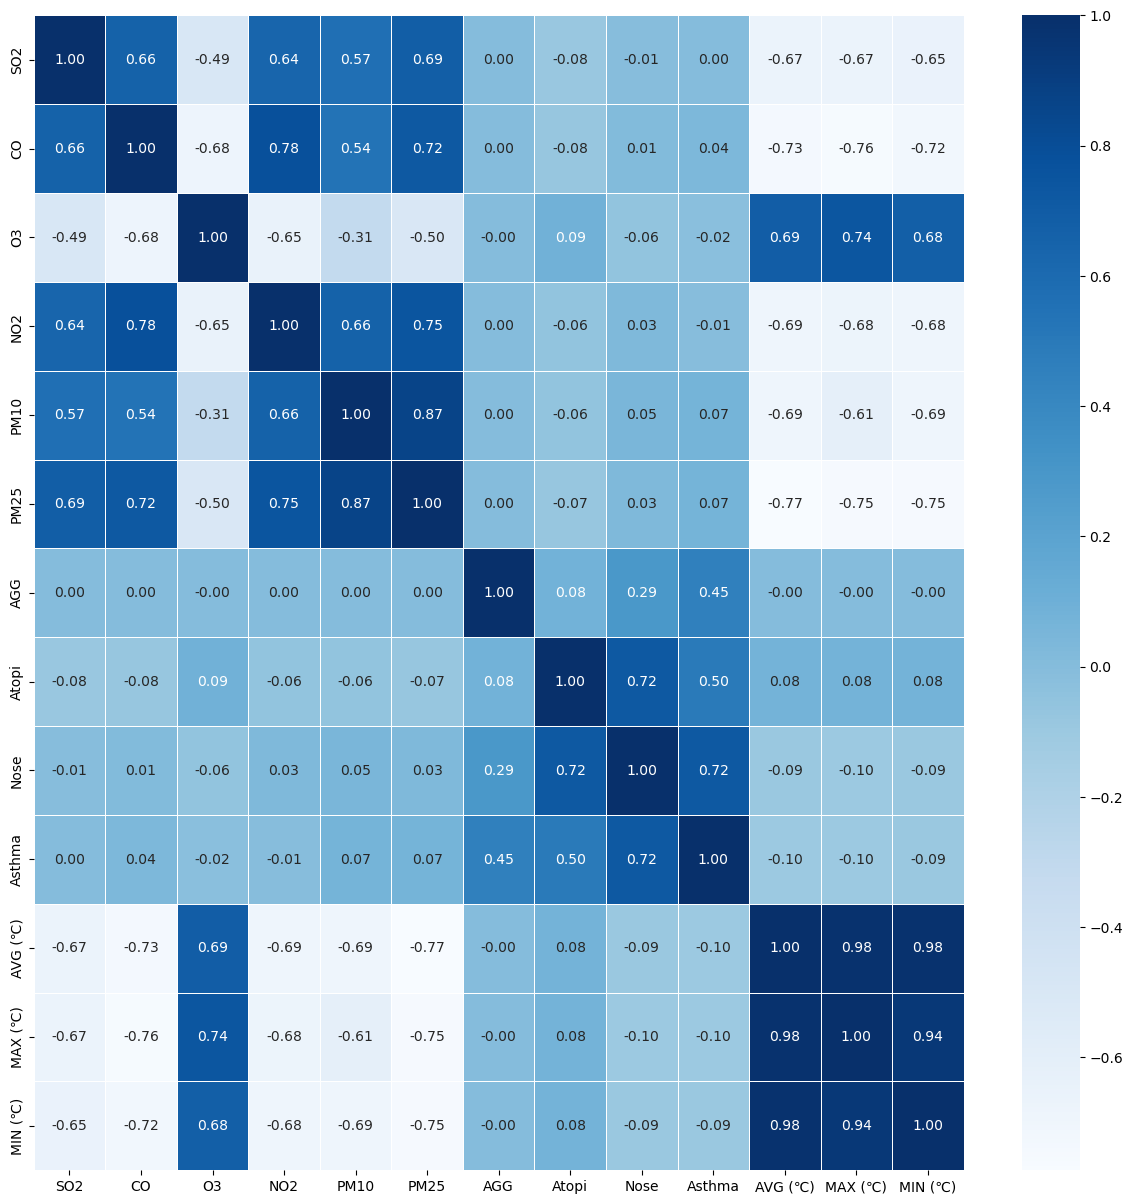

In [754]:
import matplotlib.pyplot as plt 
import seaborn as sns

plt.figure(figsize=(15,15))
sns.heatmap(data=merged_df.corr(numeric_only=True), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues')

## 데이터 전처리
- 평균, 최고, 최저 기온을 제외한 나머지 데이터는 지우고 데이터 표준화를 진행한다.

In [755]:
df = pd.DataFrame(merged_df)

In [756]:
from sklearn.preprocessing import StandardScaler

# 수치형 변수 선택
numerical_columns = ['PM25', 'PM10', 'SO2', 'CO', 'O3', 'NO2', 'Atopi', 'Nose', 'Asthma', 'AVG (℃)', 'MAX (℃)', 'MIN (℃)']

# 표준화 진행
ss = StandardScaler()
df[numerical_columns] = ss.fit_transform(df[numerical_columns])

# 결과 확인
print(df.head())

     Month     Area       SO2        CO        O3       NO2      PM10  \
0  2020-01  Gangnam  0.337226  3.623843 -1.469338  1.816659  0.447605   
1  2020-01  Gangnam  0.337226  3.623843 -1.469338  1.816659  0.447605   
2  2020-01  Gangnam  0.337226  3.623843 -1.469338  1.816659  0.447605   
3  2020-01  Gangnam  0.337226  3.623843 -1.469338  1.816659  0.447605   
4  2020-01  Gangnam  0.337226  3.623843 -1.469338  1.816659  0.447605   

       PM25  AGG     Atopi      Nose    Asthma  Season  AVG (℃)  MAX (℃)  \
0  1.121056    0  0.232186 -0.555723  1.374731  Winter -1.20461 -1.52985   
1  1.121056    1 -0.019065 -0.147368  1.263432  Winter -1.20461 -1.52985   
2  1.121056    2 -0.270316 -0.118200 -0.461696  Winter -1.20461 -1.52985   
3  1.121056    3  2.370882  5.249456  3.470854  Winter -1.20461 -1.52985   
4  1.121056    4  0.471180  3.418975  2.626840  Winter -1.20461 -1.52985   

    MIN (℃)  
0 -0.810258  
1 -0.810258  
2 -0.810258  
3 -0.810258  
4 -0.810258  


In [757]:
from sklearn.linear_model import Ridge

features = ['AVG (℃)', 'SO2', 'CO', 'O3', 'NO2', 'PM10']

# 종속 변수 선택 (예측하고자 하는 값)
target = 'PM25'

# 훈련 데이터와 테스트 데이터로 분리
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=42)

# 릿지 모델 초기화
ridge = Ridge()

# 모델 훈련
ridge.fit(X_train, y_train)
# 예측
predictions = ridge.predict(X_test)

print(ridge.score(X_train, y_train))
print(ridge.score(X_test, y_test))
predictions

0.857062648517685
0.8561077149989145


array([ 0.19534091, -1.6187853 , -0.78597435, ...,  0.12117936,
        1.48528188, -0.86448586])

## 릿지 모델 사용
- 릿지 모델에 맞춰서 훈련을 진행하고 온도 데이터와 대기오염 수치 그리고 미세먼지에 대한
- 초미세먼지 예측 모델을 만들어 보았다.
- 스코어 점수는 87 정도로 매우 준수하게 나왔다.

In [758]:
from sklearn.model_selection import cross_validate
import numpy as np

scores = cross_validate(ridge, X_train, y_train, return_train_score=True, n_jobs=-1)

np.mean(scores['train_score']), np.mean(scores['test_score'])

(0.8571214446205679, 0.8558627988993421)

In [759]:
ridge.fit(X_train, y_train)
ridge.coef_

array([-0.07421734,  0.1082364 ,  0.21726226, -0.03402085,  0.04220841,
        0.59920708])

## 교차검증
- 교차검증도 문제없이 잘 진행된다.

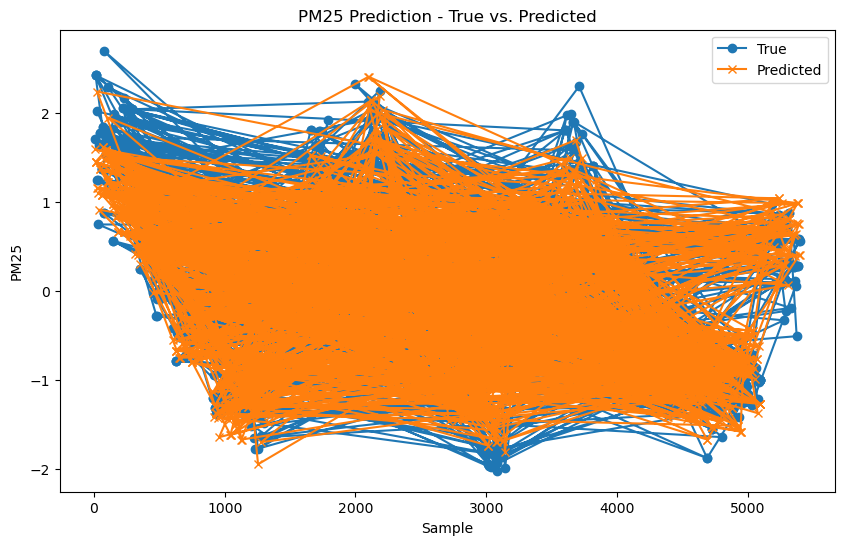

In [760]:
# 예측 결과 및 실제 결과를 데이터프레임에 추가
result_df = pd.DataFrame({'True_PM25': y_test, 'Predicted_PM25': predictions})

# 선형 그래프로 예측값과 실제값 비교
plt.figure(figsize=(10, 6))
plt.plot(result_df['True_PM25'], label='True', marker='o')
plt.plot(result_df['Predicted_PM25'], label='Predicted', marker='x')
plt.title('PM25 Prediction - True vs. Predicted')
plt.xlabel('Sample')
plt.ylabel('PM25')
plt.legend()
plt.show()

## 시각화
- 릿지 모델의 경우는 어느정도 비슷하게 예측을 하는것을 보니 꽤나 정확한 값을 얻을 수 있는 모델이다.

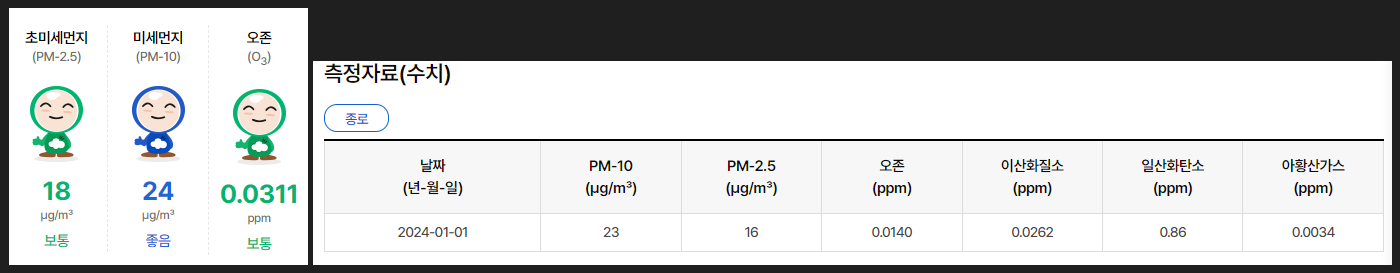

In [761]:
new_data = pd.DataFrame({
    'SO2' : [0.0034],
    'AVG (℃)': [3],
    'CO':[0.86], 
    'O3':[0.0140], 
    'NO2':[0.0262], 
    'PM10':[23]
})
coef = ridge.coef_
# 모델을 사용하여 수치 예측
predicted = np.dot(new_data, coef)

# 예측 결과 출력
print('Predicted :', predicted)

Predicted : [14.29369485]


## 임의의 데이터 삽입
- 2024-01-01 날짜의 기온과 미세먼지 수치, 대기오염 수치를 입력받았을 때 예측하는 값이다.
- 오차 범위가 5정도로 더 좋은 예측 모델을 찾아봐야할 것 같다.

In [813]:
from sklearn.linear_model import Lasso

features = ['AVG (℃)', 'SO2', 'CO', 'O3', 'NO2', 'PM10']

# 종속 변수 선택 (예측하고자 하는 값)
target = 'PM25'

# 훈련 데이터와 테스트 데이터로 분리
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=42)

# 릿지 모델 초기화
lasso = Lasso(alpha=0.01)

# 모델 훈련
lasso.fit(X_train, y_train)
# 예측
predictions = lasso.predict(X_test)

print(lasso.score(X_train, y_train))
print(lasso.score(X_test, y_test))
predictions

0.8564109266556981
0.8554616798818349


array([ 0.19470338, -1.57675222, -0.76995956, ...,  0.11847469,
        1.43868289, -0.85302767])

## 적합도
- 랏소와 릿지는 거이 비슷한 결과값을 만들어 내는것 같다.
- 두개의 모델 비교는 사실상 큰 차이가 없다.

In [810]:
from sklearn.model_selection import cross_validate
import numpy as np

scores = cross_validate(lasso, X_train, y_train, return_train_score=True, n_jobs=-1)

np.mean(scores['train_score']), np.mean(scores['test_score'])

(0.856958357951417, 0.8557048057172297)

In [811]:
ridge.fit(X_train, y_train)
ridge.coef_

array([-0.07421734,  0.1082364 ,  0.21726226, -0.03402085,  0.04220841,
        0.59920708])

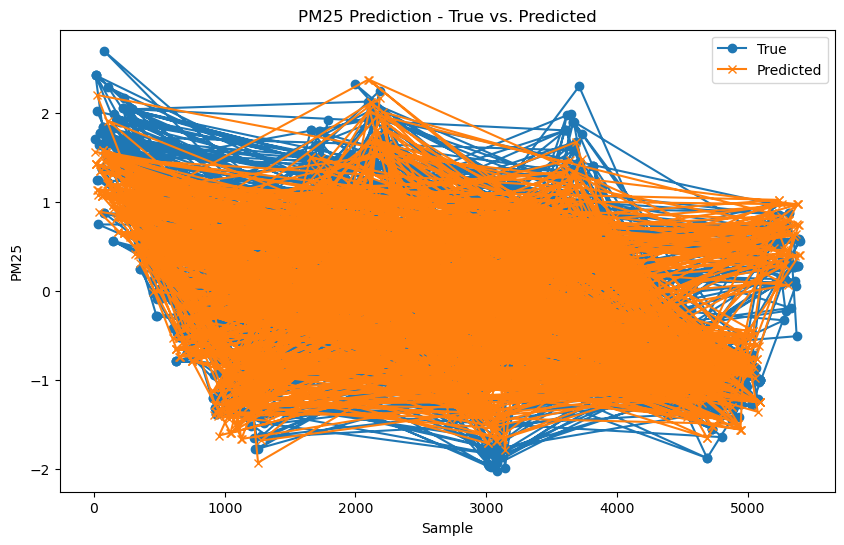

In [812]:
# 예측 결과 및 실제 결과를 데이터프레임에 추가
result_df = pd.DataFrame({'True_PM25': y_test, 'Predicted_PM25': predictions})

# 선형 그래프로 예측값과 실제값 비교
plt.figure(figsize=(10, 6))
plt.plot(result_df['True_PM25'], label='True', marker='o')
plt.plot(result_df['Predicted_PM25'], label='Predicted', marker='x')
plt.title('PM25 Prediction - True vs. Predicted')
plt.xlabel('Sample')
plt.ylabel('PM25')
plt.legend()
plt.show()

## 시각화
- 랏소와 릿지 모델은 크게 차이 없어보인다.
- 이제 그럼 랜덤포레스트 모델을 적용시켜보자.

In [773]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

features = ['AVG (℃)', 'PM10']

# 종속 변수 선택 (예측하고자 하는 값)
target = 'PM25'

# 훈련 데이터와 테스트 데이터로 분리
X_train, X_test, y_train, y_test = train_test_split(merged_df[features], merged_df[target], test_size=0.2, random_state=42)

# 랜덤 포레스트 모델 초기화
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# 모델 훈련
rf.fit(X_train, y_train)

# 테스트 데이터에 대한 예측
predictions = rf.predict(X_test)

## 랜덤 포레스트
- 기온, 미세먼지 수치에 따른 초미세먼지 수치를 예측해보고자 한다.
- 기온은 계절과도 어느정도 상관관계가 있는 수치이니, 계절에 따라 수치의 폭이 있었던 만큼
- 꽤나 기대되는 결과값이 나올 수도 있을것 같다.

In [774]:
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier

scores = cross_validate(rf, X_train, y_train, return_train_score=True, n_jobs=-1)

np.mean(scores['train_score']), np.mean(scores['test_score'])

(0.9997398138691397, 0.9984931755332612)

In [775]:
# 랜덤 포레스트 모델을 훈련세트로 훈련한 후 특성 중요도 확인
rf.fit(X_train, y_train)
rf.feature_importances_

array([0.74119156, 0.25880844])

## 교차검증
- 교차검증을 진행했을 때, 너무높은 예측도를 보여주었다.
- 특성 중요도를 살펴보았을 때 기온은 25% 정도 이고 미세먼지 수치는 74% 의 수치를 갖는 것으로 보아,
- 기온이 생각보다 차지하는 비중이 많아 확실하게 어느정도 계절과의 상관관계가 있음을 생각할 수 있다.

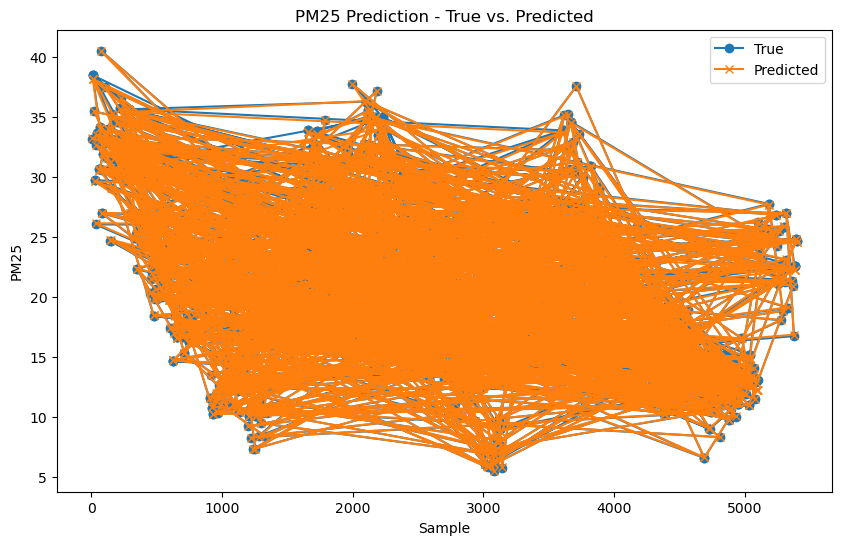

In [776]:
import matplotlib.pyplot as plt

# 예측 결과 및 실제 결과를 데이터프레임에 추가
result_df = pd.DataFrame({'True_PM25': y_test, 'Predicted_PM25': predictions})

# 선형 그래프로 예측값과 실제값 비교
plt.figure(figsize=(10, 6))
plt.plot(result_df['True_PM25'], label='True', marker='o')
plt.plot(result_df['Predicted_PM25'], label='Predicted', marker='x')
plt.title('PM25 Prediction - True vs. Predicted')
plt.xlabel('Sample')
plt.ylabel('PM25')
plt.legend()
plt.show()

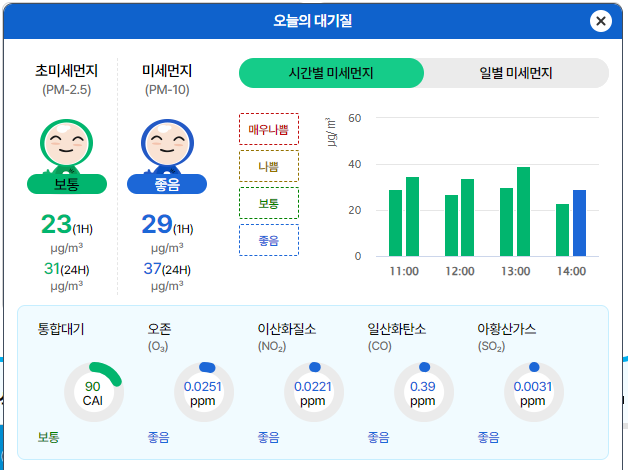
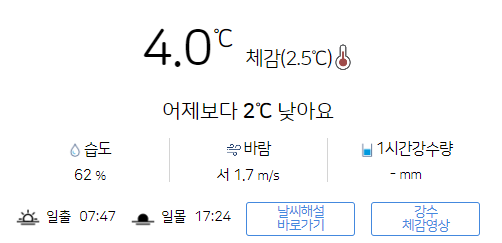

In [779]:
# 임의의 입력값 생성 (예: 각 특성에 대한 값을 적절히 설정)
new_data = pd.DataFrame({
    'AVG (℃)': [4],
    'PM10' : [29]
})
# 모델을 사용하여 PM25 수치 예측
predicted_pm25 = rf.predict(new_data)

# 예측 결과 출력
print('Predicted PM25:', predicted_pm25)

Predicted PM25: [23.35373501]


## 예측 결과
- 2024-01-02 오후 3시 30분 실시간 데이터를 입력하였을 때에 PM25 수치를 예측한 결과이다.
- 매우매우 근접하게 값이 예측이 된것을 보니 제일 적합한 모델임을 알 수 있다.

C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categor

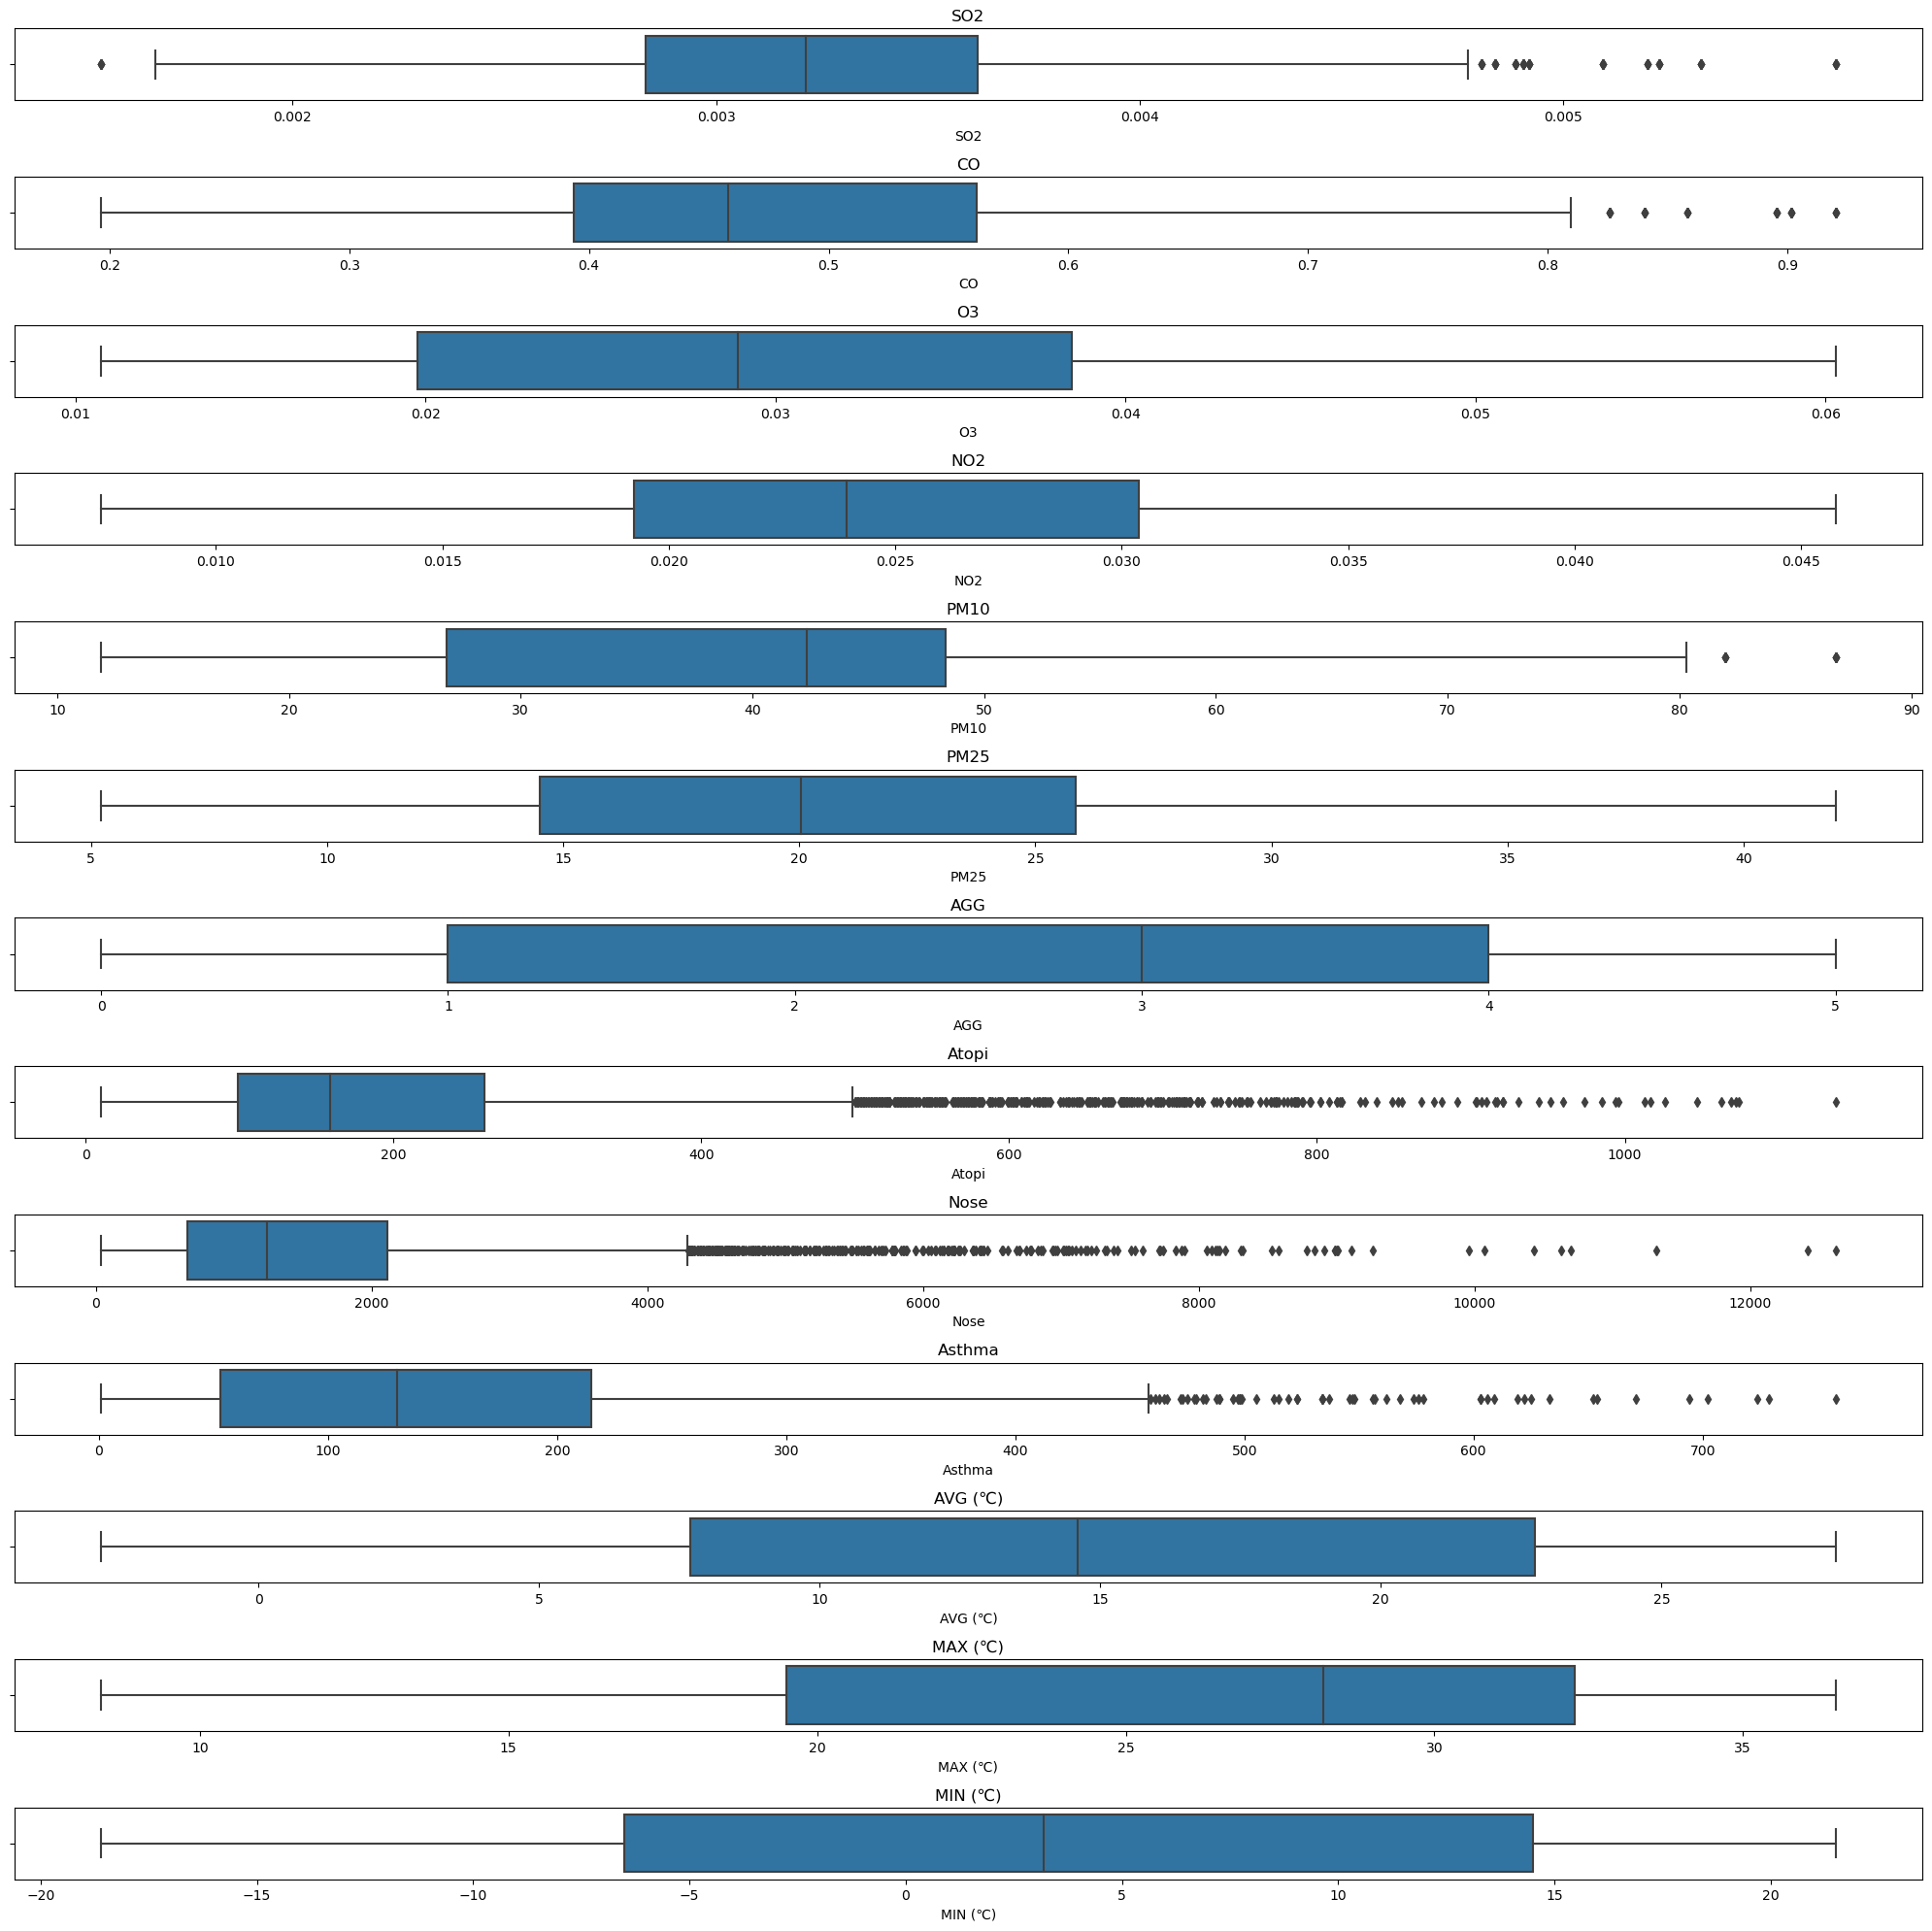

In [780]:
# 이상치 시각화
import matplotlib.pyplot as plt
import seaborn as sns

# 수치형 컬럼 선택
numeric_columns = merged_df.select_dtypes(include=['number']).columns

# 박스 플롯을 사용하여 각 컬럼의 이상치 시각화
plt.figure(figsize=(20, 20))

for i, col in enumerate(numeric_columns):
    plt.subplot(len(numeric_columns), 1, i+1)
    sns.boxplot(x=merged_df[col])
    plt.title(col)

plt.tight_layout()
plt.show()

## 이상치 값 비교
- 이번에는 질병 데이터를 가지고 랜덤포레스트를 진행할 예정이다.
- 그러기전에 이상치값을 해당 월평균 데이터로 전처리를 진행하고 진행한다.

In [781]:
import pandas as pd

# 기존 데이터프레임을 복사하여 새로운 데이터프레임 생성
new_df = merged_df.copy()

# Asthma가 500을 넘는 행을 찾음
high_asthma_rows = merged_df[merged_df['Asthma'] > 500]

# 찾은 행들을 월별로 그룹화하고 Asthma 평균을 계산
asthma_by_month = new_df.groupby('Month')['Asthma'].mean()

# Asthma가 500을 넘는 행들을 해당 월의 평균 Asthma 값으로 대체
for index, row in high_asthma_rows.iterrows():
    month = row['Month']
    new_asthma_value = asthma_by_month[month]
    new_df.at[index, 'Asthma'] = new_asthma_value

C:\Users\user\AppData\Local\Temp\ipykernel_14824\4266919198.py:16: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '292.34' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  new_df.at[index, 'Asthma'] = new_asthma_value


In [782]:
import pandas as pd

# atopi가 600을 넘는 행을 찾음
high_atopi_rows = new_df[new_df['Atopi'] > 600]

# 찾은 행들을 월별로 그룹화하고 atopi 평균을 계산
atopi_by_month = new_df.groupby('Month')['Atopi'].mean()

# atopi가 600을 넘는 행들을 해당 월의 평균 atopi 값으로 대체
for index, row in high_atopi_rows.iterrows():
    month = row['Month']
    new_atopi_value = atopi_by_month[month]
    new_df.at[index, 'Atopi'] = new_atopi_value

C:\Users\user\AppData\Local\Temp\ipykernel_14824\2533599263.py:13: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '186.62' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  new_df.at[index, 'Atopi'] = new_atopi_value


In [783]:
import pandas as pd

# nose가 6000을 넘는 행을 찾음
high_nose_rows = new_df[new_df['Nose'] > 6000]

# 찾은 행들을 월별로 그룹화하고 nose 평균을 계산
nose_by_month = new_df.groupby('Month')['Nose'].mean()

# nose가 6000을 넘는 행들을 해당 월의 평균 nose 값으로 대체
for index, row in high_nose_rows.iterrows():
    month = row['Month']
    new_nose_value = nose_by_month[month]
    new_df.at[index, 'Nose'] = new_nose_value

# 결과 확인
print(new_df)

        Month      Area       SO2        CO        O3       NO2       PM10  \
0     2020-01   Gangnam  0.003452  0.920034  0.013274  0.038058  45.033130   
1     2020-01   Gangnam  0.003452  0.920034  0.013274  0.038058  45.033130   
2     2020-01   Gangnam  0.003452  0.920034  0.013274  0.038058  45.033130   
3     2020-01   Gangnam  0.003452  0.920034  0.013274  0.038058  45.033130   
4     2020-01   Gangnam  0.003452  0.920034  0.013274  0.038058  45.033130   
...       ...       ...       ...       ...       ...       ...        ...   
5393  2022-12  Jungrang  0.002923  0.493052  0.018791  0.026081  45.378608   
5394  2022-12  Jungrang  0.002923  0.493052  0.018791  0.026081  45.378608   
5395  2022-12  Jungrang  0.002923  0.493052  0.018791  0.026081  45.378608   
5396  2022-12  Jungrang  0.002923  0.493052  0.018791  0.026081  45.378608   
5397  2022-12  Jungrang  0.002923  0.493052  0.018791  0.026081  45.378608   

           PM25  AGG  Atopi         Nose  Asthma  Season  AVG (

C:\Users\user\AppData\Local\Temp\ipykernel_14824\2296686358.py:13: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '2955.153333333333' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  new_df.at[index, 'Nose'] = new_nose_value


In [784]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

features = ['PM10', 'O3', 'CO', 'SO2', 'NO2', 'PM25']

# 종속 변수 선택 (예측하고자 하는 값)
target = 'Asthma'

# 훈련 데이터와 테스트 데이터로 분리
X_train, X_test, y_train, y_test = train_test_split(new_df[features], new_df[target], test_size=0.3, random_state=42)

# 랜덤 포레스트 모델 초기화
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# 모델 훈련
rf.fit(X_train, y_train)

# 테스트 데이터에 대한 예측
predictions = rf.predict(X_test)

In [785]:
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier
import numpy as np

scores = cross_validate(rf, X_train, y_train, return_train_score=True, n_jobs=-1)

np.mean(scores['train_score']), np.mean(scores['test_score'])

(0.4492716773275679, -0.01713525425873772)

## 어렵다
- 상관관계가 크게 없다보니, 스코어 점수도 낮고 사실상의 예측이 엄청나게 어렵다.
- 본 모델에는 Asthma(천식) 만 비교해서 넣었는데, Nose(비염), Atopi(아토피) 등도 결과는 비슷하게 나왔다.
- 예측이 불가능한 모델도 만들어서 한번 테스트 해보자.

In [786]:
# 랜덤 포레스트 모델을 훈련세트로 훈련한 후 특성 중요도 확인
rf.fit(X_train, y_train)
rf.feature_importances_

array([0.17303462, 0.17178396, 0.18526944, 0.17109257, 0.15626025,
       0.14255916])

## 특성 중요도
- 사실상 특성의 중요도 중에서도 눈에띄는 특성은 없다.
- 어떤 값도 영향을 주지못한다는 것이다.

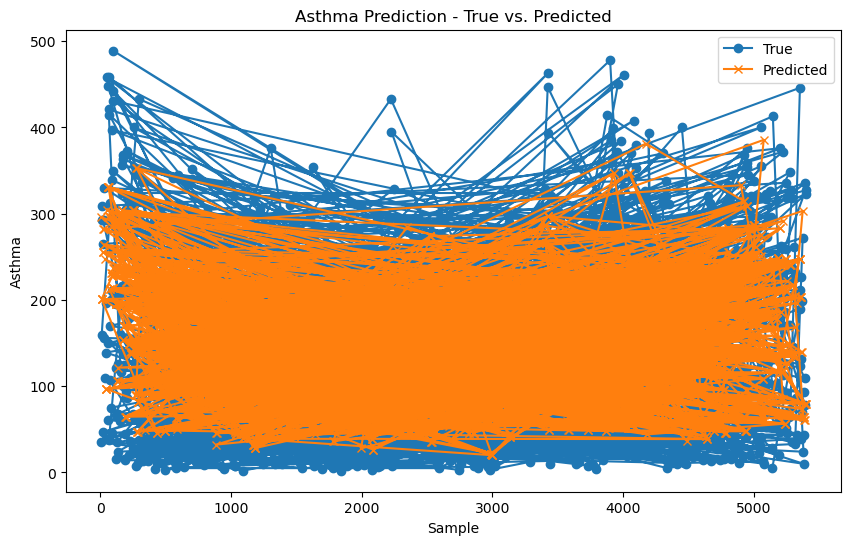

In [787]:
import matplotlib.pyplot as plt

# 예측 결과 및 실제 결과를 데이터프레임에 추가
result_df = pd.DataFrame({'True_Asthma': y_test, 'Predicted_Asthma': predictions})

# 선형 그래프로 예측값과 실제값 비교
plt.figure(figsize=(10, 6))
plt.plot(result_df['True_Asthma'], label='True', marker='o')
plt.plot(result_df['Predicted_Asthma'], label='Predicted', marker='x')
plt.title('Asthma Prediction - True vs. Predicted')
plt.xlabel('Sample')
plt.ylabel('Asthma')
plt.legend()
plt.show()

## 시각화
- 예측값이 아예 다른 예측값이 나온다. 질병은 대기오염와 미세먼지와는 연관이 없다는 것을 확인했다.

In [788]:
!pip install pandas numpy matplotlib statsmodels

## 딥러닝 맛보기
- 딥러닝에 대해서 공부를 살짝 맛보기로 하고 시계열 데이터를 이용해서 예측모델을 만들어볼것이다.

In [789]:
# Month 컬럼을 인덱스로 설정
df.set_index('Month', inplace=True)

# RangeIndex로 재설정
df.reset_index(inplace=True)

In [790]:
# Month 컬럼을 인덱스로 설정
df.set_index('Month', inplace=True)

# RangeIndex 추가
df['RangeIndex'] = range(len(df))

# "Month" 컬럼을 다시 열로 변환 (선택적)
df.reset_index(inplace=True)

## 전처리
- 우선 원래 가지고있는 Month 컬럼의 전처리가 필요했다. 인덱스를 초기화 해주고 인덱스를 새로 설정해서 지정해야
- 시계열 모델에 사용이 가능해지는 데이터화가 가능했다.

In [791]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from itertools import product

# 데이터프레임 생성 및 전처리 (위의 코드 참고)
# ...

# 훈련 데이터와 테스트 데이터 분리
train, test = train_test_split(df_arima['PM25'], test_size=0.2, shuffle=False)

# 그리드 서치를 위한 파라미터 후보값 정의
p_values = range(0, 3)
d_values = range(0, 2)
q_values = range(0, 3)

# 최적의 파라미터와 최소 RMSE 초기화
best_params = None
best_rmse = float('inf')

# 그리드 서치 수행
for p, d, q in product(p_values, d_values, q_values):
    order = (p, d, q)
    try:
        # ARIMA 모델 훈련
        model = ARIMA(train, order=order)
        fit_model = model.fit()

        # 테스트 데이터에 대한 예측
        predictions = fit_model.predict(start=len(train), end=len(train) + len(test) - 1, typ='levels')

        # 평가 지표 계산
        rmse = sqrt(mean_squared_error(test, predictions))

        # 현재 파라미터에 대한 결과 출력 (선택사항)
        print(f'Order: {order}, RMSE: {rmse}')

        # 최적의 파라미터 및 최소 RMSE 업데이트
        if rmse < best_rmse:
            best_params = order
            best_rmse = rmse

    except Exception as e:
        print(f"Error for order {order}: {e}")

# 최적의 파라미터 출력
print(f'Best Parameters: {best_params}, Best RMSE: {best_rmse}')

C:\Users\user\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users

Order: (0, 0, 0), RMSE: 1.0259091699014649


C:\Users\user\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\user\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\user\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
C:\Users\user\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  se

Order: (0, 0, 1), RMSE: 1.0260711553905113


C:\Users\user\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\user\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\user\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
C:\Users\user\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  se

Order: (0, 0, 2), RMSE: 1.0262469340055396


C:\Users\user\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\user\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\user\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
C:\Users\user\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  se

Order: (0, 1, 0), RMSE: 0.7245609366346623


C:\Users\user\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\user\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\user\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
C:\Users\user\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  se

Order: (0, 1, 1), RMSE: 0.7245609366346623


C:\Users\user\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\user\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\user\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
C:\Users\user\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  se

Order: (0, 1, 2), RMSE: 0.7245609366346623


C:\Users\user\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\user\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\user\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
C:\Users\user\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  se

Order: (1, 0, 0), RMSE: 1.0005678209802673


C:\Users\user\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\user\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\user\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
C:\Users\user\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  se

Order: (1, 0, 1), RMSE: 1.0010651387083769


C:\Users\user\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\user\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\user\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
C:\Users\user\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  se

Order: (1, 0, 2), RMSE: 1.0015560487897857


C:\Users\user\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\user\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\user\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
C:\Users\user\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  se

Order: (1, 1, 0), RMSE: 0.7245609366346623


C:\Users\user\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\user\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\user\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
C:\Users\user\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  se

Order: (1, 1, 1), RMSE: 0.7245609366346623


C:\Users\user\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\user\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\user\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
C:\Users\user\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  se

Order: (1, 1, 2), RMSE: 0.7245609366346623


C:\Users\user\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\user\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\user\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
C:\Users\user\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  se

Order: (2, 0, 0), RMSE: 1.0010653592788725


C:\Users\user\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\user\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\user\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
C:\Users\user\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  se

Order: (2, 0, 1), RMSE: 1.0110374602146786


C:\Users\user\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\user\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\user\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
C:\Users\user\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  se

Order: (2, 0, 2), RMSE: 1.0087706276701034


C:\Users\user\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\user\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\user\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
C:\Users\user\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  se

Order: (2, 1, 0), RMSE: 0.7245609366346623


C:\Users\user\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\user\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\user\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
C:\Users\user\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  se

Order: (2, 1, 1), RMSE: 0.7245609366346623
Order: (2, 1, 2), RMSE: 0.7245609366346623
Best Parameters: (0, 1, 0), Best RMSE: 0.7245609366346623


C:\Users\user\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\user\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\user\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


## 최적의 파라미터 모델 찾기
- 현재 데이터에서 최적의 파라미터 모델을 찾는다.
- Best Parameters: (0, 1, 0), Best RMSE: 0.7245609366346623
- p (AR, AutoRegressive): 이전의 시차(lag)에서의 자료를 얼마나 반영할지를 결정합니다. 즉, 현재 시점의 자료를 예측하는데                                             이전 시점의 자료를 얼마나 사용할지를 결정합니다.
- d (Integrated): 차분(Differencing)의 차수를 나타냅니다. 차분은 현재 자료에서 이전 자료를 뺀 것으로,
                  시계열 데이터의 정상성(stationarity)을 유지하기 위해 사용됩니다.
- q (MA, Moving Average): 이전 시차(lag)의 예측 오차를 얼마나 반영할지를 결정합니다. 
                          이전 시점의 예측 오차를 현재 시점의 예측에 사용하여 모델을 구성합니다.

C:\Users\user\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users

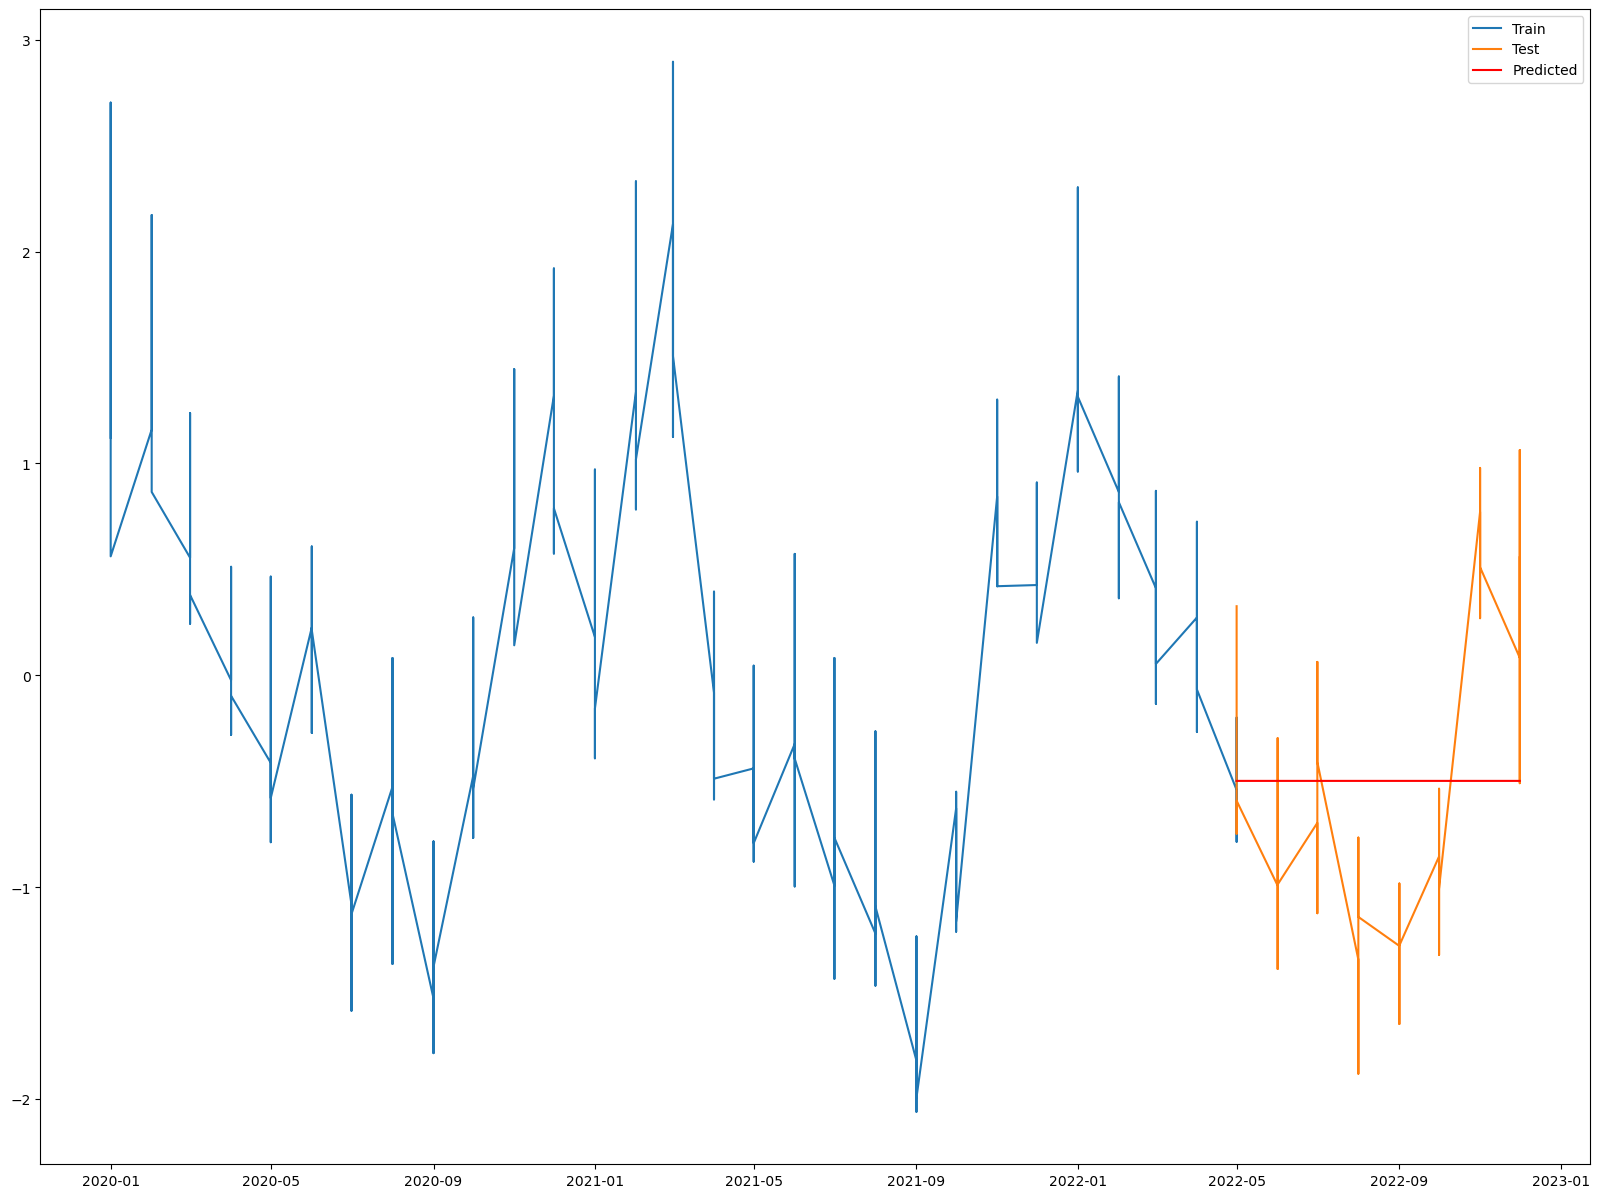

Root Mean Squared Error (RMSE): 0.7245609366346623


In [792]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

df_arima = pd.DataFrame(df)
df_arima['Month'] = pd.to_datetime(df_arima['Month'].astype(str), format='%Y-%m')
df_arima.set_index('Month', inplace=True)

# 훈련 데이터와 테스트 데이터 분리
train, test = train_test_split(df_arima['PM25'], test_size=0.2, shuffle=False)

# ARIMA 모델 훈련
order = (0, 1, 0)
model = ARIMA(train, order=order)
fit_model = model.fit()

# 테스트 데이터에 대한 예측
predictions = fit_model.predict(start=len(train), end=len(train) + len(test) - 1, typ='levels')

# 예측 결과 시각화
plt.figure(figsize=(20, 15))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(test.index, predictions, label='Predicted', color='red')
plt.legend()
plt.show()

# 평가 지표 출력
rmse = sqrt(mean_squared_error(test, predictions))
print(f'Root Mean Squared Error (RMSE): {rmse}')

## 시계열 예측 모델 사용
- 파랑색은 예측모델에 사용된 데이터
- 주황색은 테스트에 사용된 데이터
- 빨간선이 예측된 값인데, 대략 평균적인 데이터의 값으로 맞춰지는 느낌이 있다.

C:\Users\user\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users

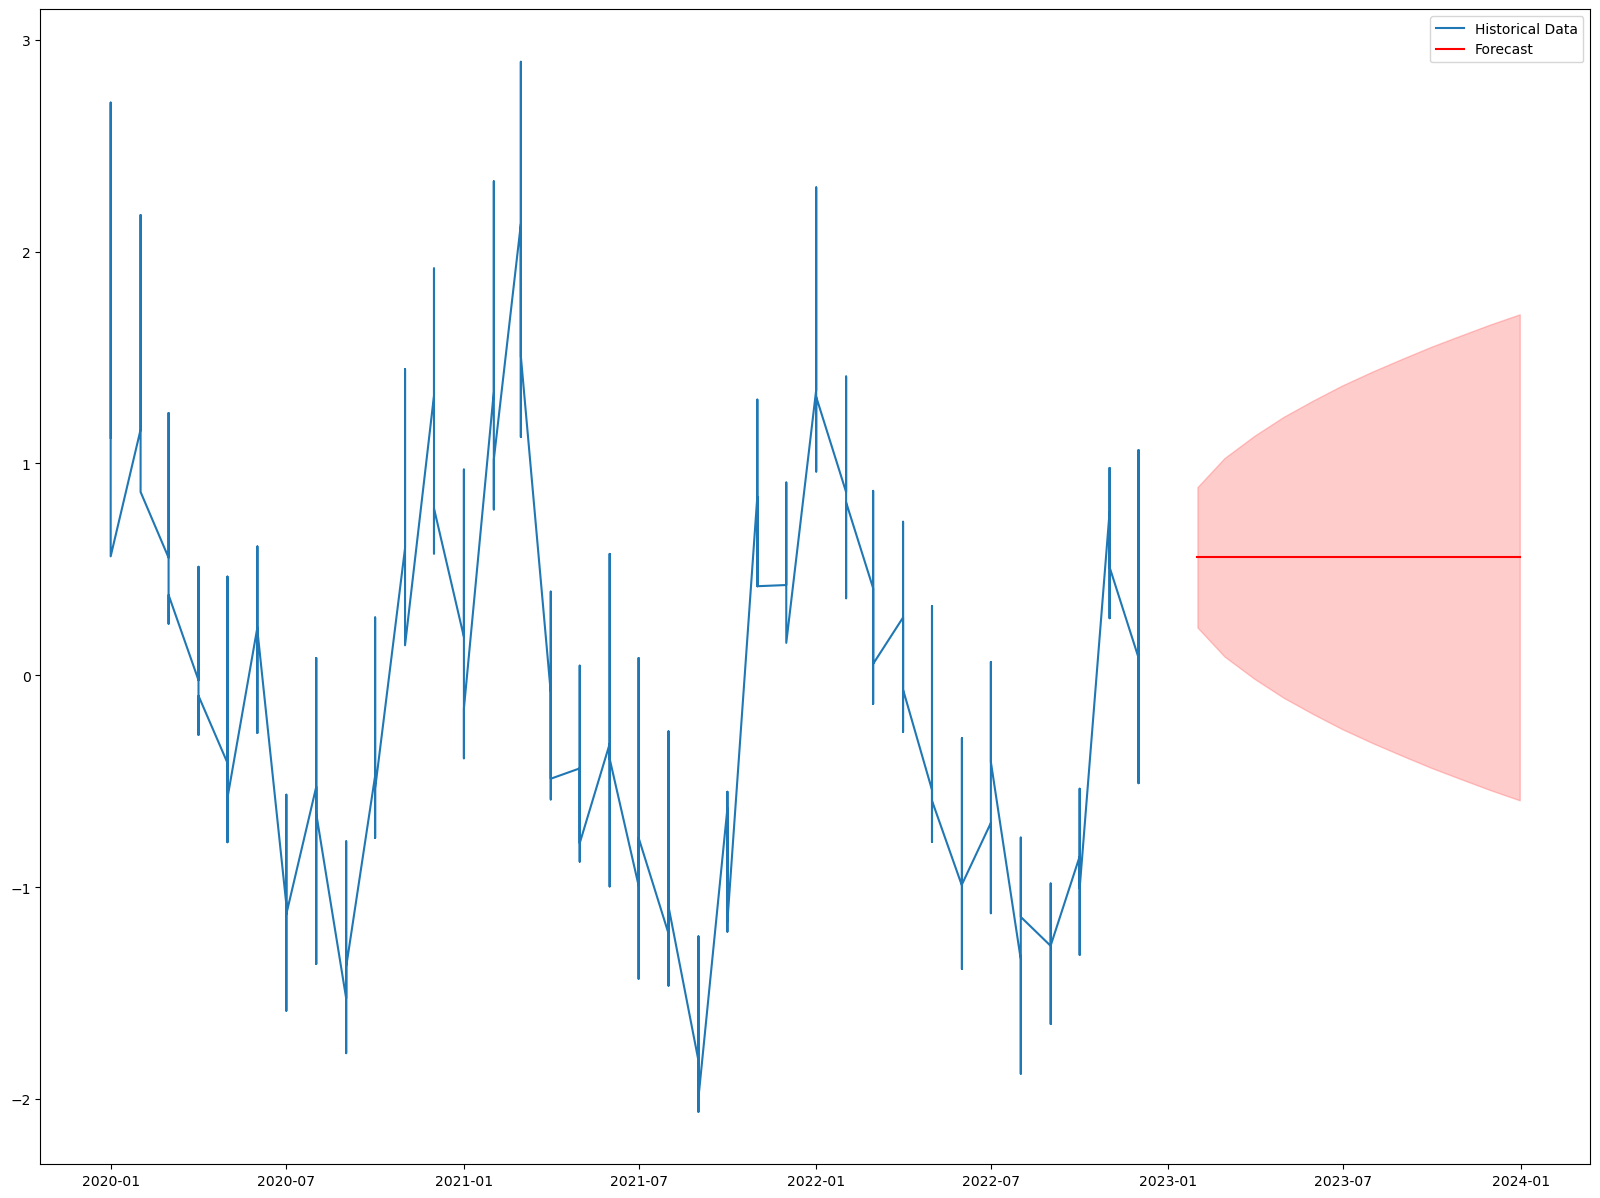

In [793]:
# 최적의 파라미터로 ARIMA 모델 재훈련
optimal_order = best_params
optimal_model = ARIMA(df_arima['PM25'], order=optimal_order)
optimal_fit_model = optimal_model.fit()

# 미래 데이터에 대한 예측
forecast_steps = 12  # 예측할 기간 (예: 12개월)
forecast = optimal_fit_model.get_forecast(steps=forecast_steps)

# 예측 결과 시각화
plt.figure(figsize=(20, 15))
plt.plot(df_arima.index, df_arima['PM25'], label='Historical Data')
plt.plot(pd.date_range(start=df_arima.index[-1], periods=forecast_steps + 1, freq='M')[1:], forecast.predicted_mean, label='Forecast', color='red')
plt.fill_between(pd.date_range(start=df_arima.index[-1], periods=forecast_steps + 1, freq='M')[1:], forecast.conf_int()['lower PM25'], forecast.conf_int()['upper PM25'], color='red', alpha=0.2)
plt.legend()
plt.show()

## 미래 예측해보기
- 2023-01 ~ 2024-01 향후 1년간의 예측모델이다.
- PM25 초미세먼지 수치는 평균적으로 저정도에 수렴할것이다 라고 예측된 것인데,
- 정확한 분석을 위해서는 딥러닝 공부를 더 해야 완벽하게 이해할 수 있을것 같다.